# Check GPU Environment

Select GPU in Colab: We need to switch our runtime from CPU to GPU. Click on Runtime > Change runtime type > Hardware Accelerator > GPU > Save.

NVIDIA’s GPUs are primarily categorized into different series like GeForce, Quadro, or Tesla. Each series is tailored for different uses – GeForce for gaming, Quadro for professional graphics, and Tesla for data centers and deep learning.

## nvidia-smi

nvidia-smi (NVIDIA System Management Interface) is a powerful command-line utility for managing and monitoring NVIDIA GPUs in Linux environments.

In [ ]:
!nvidia-smi

Sun Apr 21 16:19:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

nvidia-smi provides a basic identification. The first line displays the version of nvidia-smi and the installed NVIDIA Driver Version.

CUDA Version – indicates the version of Compute Unified Device Architecture (CUDA) that is compatible with the installed drivers

Fan, Temp, Perf, Pwr – shows the current fan speed, temperature, performance state, and power usage, respectively, of the GPU
Memory-Usage – indicates how much GPU memory is currently in use
GPU-Util – shows the percentage of GPU computational capacity in current usage
Compute M. – displays the current compute mode of the GPU

In [ ]:
!nvidia-smi -q -i 0 | grep "Product Name"

    Product Name                          : Tesla T4


run the nvidia-smi command; to target a specific GPU you can use the --id option where the value is the device number to target

In [ ]:
!!nvidia-smi --id 0

['Sun Apr 21 17:05:10 2024       ',
 '+---------------------------------------------------------------------------------------+',
 '| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |',
 '|-----------------------------------------+----------------------+----------------------+',
 '| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |',
 '| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |',
 '|                                         |                      |               MIG M. |',
 '|=========================================+======================+======================|',
 '|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |',
 '| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |',
 '|                                         |                      |                  N/A |',
 '+---------------------

In [ ]:
!nvidia-smi -L # lists all GPUs in the system:

GPU 0: Tesla T4 (UUID: GPU-bff8815a-a309-3f03-4955-430221908b5e)


In [ ]:
!nvidia-smi --query-gpu=gpu_name --format=csv

name
Tesla T4


The system we are using has a Tesla T4 GPU, which is based on Turing architecture. Tesla T4 is a GPU card based on the Turing architecture and targeted at deep learning model inference acceleration.

Query the VBIOS version of each device:

In [ ]:
!nvidia-smi --query-gpu=gpu_name,gpu_bus_id,vbios_version --format=csv

name, pci.bus_id, vbios_version
Tesla T4, 00000000:00:04.0, 90.04.A7.00.01


nvidia-smi excels in real-time monitoring of GPU performance.
It provides information on GPU utilization, memory usage, and temperature.
You can track how much of the GPU’s computational power the system is currently using and manage workload optimization.
Real-time temperature readings help prevent thermal throttling and maintain optimal performance.

You can get a complete list of the query arguments by issuing: `nvidia-smi --help-query-gpu`

In [ ]:
!nvidia-smi --help-query-gpu

List of valid properties to query for the switch "--query-gpu":

"timestamp"
The timestamp of when the query was made in format "YYYY/MM/DD HH:MM:SS.msec".

"driver_version"
The version of the installed NVIDIA display driver. This is an alphanumeric string.

Section about vgpu_driver_capability properties
Retrieves information about driver level caps.

"vgpu_driver_capability.heterogenous_multivGPU"
Whether heterogeneuos multi-vGPU is supported by driver.

"count"
The number of NVIDIA GPUs in the system.

"name" or "gpu_name"
The official product name of the GPU. This is an alphanumeric string. For all products.

"serial" or "gpu_serial"
This number matches the serial number physically printed on each board. It is a globally unique immutable alphanumeric value.

"uuid" or "gpu_uuid"
This value is the globally unique immutable alphanumeric identifier of the GPU. It does not correspond to any physical label on the board.

"pci.bus_id" or "gpu_bus_id"
PCI bus id as "domain:bus:device.func

QUERY GPU METRICS FOR HOST-SIDE LOGGING

This query is good for monitoring the hypervisor-side GPU metrics. This query will work for both ESXi and XenServer

In [ ]:
!nvidia-smi --query-gpu=timestamp,name,pci.bus_id,driver_version,pstate,pcie.link.gen.max,pcie.link.gen.current,temperature.gpu,utilization.gpu,utilization.memory,memory.total,memory.free,memory.used --format=csv -l 5

timestamp, name, pci.bus_id, driver_version, pstate, pcie.link.gen.max, pcie.link.gen.current, temperature.gpu, utilization.gpu [%], utilization.memory [%], memory.total [MiB], memory.free [MiB], memory.used [MiB]
2024/04/21 16:59:24.102, Tesla T4, 00000000:00:04.0, 535.104.05, P8, 3, 1, 32, 0 %, 0 %, 15360 MiB, 15101 MiB, 0 MiB
2024/04/21 16:59:29.105, Tesla T4, 00000000:00:04.0, 535.104.05, P8, 3, 1, 32, 0 %, 0 %, 15360 MiB, 15101 MiB, 0 MiB
2024/04/21 16:59:34.106, Tesla T4, 00000000:00:04.0, 535.104.05, P8, 3, 1, 32, 0 %, 0 %, 15360 MiB, 15101 MiB, 0 MiB
2024/04/21 16:59:39.109, Tesla T4, 00000000:00:04.0, 535.104.05, P8, 3, 1, 32, 0 %, 0 %, 15360 MiB, 15101 MiB, 0 MiB
2024/04/21 16:59:44.110, Tesla T4, 00000000:00:04.0, 535.104.05, P8, 3, 1, 32, 0 %, 0 %, 15360 MiB, 15101 MiB, 0 MiB
2024/04/21 16:59:49.112, Tesla T4, 00000000:00:04.0, 535.104.05, P8, 3, 1, 32, 0 %, 0 %, 15360 MiB, 15101 MiB, 0 MiB
2024/04/21 16:59:54.114, Tesla T4, 00000000:00:04.0, 535.104.05, P8, 3, 1, 32, 0 %, 

–format=csv: Specifies the output format as CSV (comma-separated values).

-l 5: Sets the update interval to 5 seconds for continuous monitoring.


- **timestamp**: The timestamp of where the query was made in format "YYYY/MM/DD HH:MM:SS.msec".
- **name**: The official product name of the GPU. This is an alphanumeric string for all products.
- **pci.bus_id**: PCI bus id as "domain:bus:device.function", in hex.
- **driver_version**: The version of the installed NVIDIA display driver. This is an alphanumeric string.
- **pstate**: The current performance state for the GPU. States range from P0 (maximum performance) to P12 (minimum performance).
- **pcie.link.gen.max**: The maximum PCI-E link generation possible with this GPU and system configuration. For example, if the GPU supports a higher PCIe generation than the system supports, then this reports the system PCIe generation.
- **pcie.link.gen.current**: The current PCI-E link generation. These may be reduced when the GPU is not in use.
- **temperature.gpu**: Core GPU temperature in degrees Celsius.
- **utilization.gpu**: Percent of time over the past sample period during which one or more kernels were executing on the GPU. The sample period may be between 1 second and 1/6 second depending on the product.
- **utilization.memory**: Percent of time over the past sample period during which global (device) memory was being read or written. The sample period may be between 1 second and 1/6 second depending on the product.
- **memory.total**: Total installed GPU memory.
- **memory.free**: Total free memory.
- **memory.used**: Total memory allocated by active contexts.



You can query various GPU attributes, including clock speeds, power consumption, and supported features.

In [ ]:
!nvidia-smi -q -d POWER #view the current power limit:


==============NVSMI LOG==============

Timestamp                                 : Sun Apr 21 16:28:55 2024
Driver Version                            : 535.104.05
CUDA Version                              : 12.2

Attached GPUs                             : 1
GPU 00000000:00:04.0
    GPU Power Readings
        Power Draw                        : 9.66 W
        Current Power Limit               : 70.00 W
        Requested Power Limit             : 70.00 W
        Default Power Limit               : 70.00 W
        Min Power Limit                   : 60.00 W
        Max Power Limit                   : 70.00 W
    Power Samples
        Duration                          : 117.10 sec
        Number of Samples                 : 119
        Max                               : 13.93 W
        Min                               : 9.36 W
        Avg                               : 9.62 W
    Module Power Readings
        Power Draw                        : N/A
        Current Power Limit         

change the power limit: `sudo nvidia-smi -pl 200`

Power limit for GPU 00000000:01:00.0 set to 200.00 W from 250.00 W.

Enable manual fan control: `sudo nvidia-smi -i GPU_ID -pm 1`, We should replace GPU_ID with the ID of our GPU, such as 0 or 1.

To set the fan speed, we have to use a tool like nvidia-settings rather than nvidia-smi, as nvidia-smi doesn’t directly support fan speed adjustments: `sudo nvidia-settings -a [gpu:0]/GPUFanControlState=1 -a `

we can create a Bash script for more complex monitoring:

```bash
#!/bin/bash
while true; do
    /usr/bin/nvidia-smi >> /home/username/gpu_logs.txt
    sleep 600 # 10 minutes
done
```

The script continuously logs the output of nvidia-smi to gpu_logs.txt every 10 minutes.

Save our Bash script as gpu_monitor.sh, and after doing so, we should remember to make it executable with the chmod command:

```bash
chmod +x gpu_monitor.sh
./gpu_monitor.sh
```

We can also set this script to run at startup or use a tool like screen or tmux to keep it running in the background.

##nvtop

NVTOP stands for Neat Videocard TOP (https://github.com/Syllo/nvtop), and it’s a powerful task monitor designed for GPUs and accelerators. nvtop provides real-time monitoring of GPU and GPU memory usage.
It displays information about processes running on GPUs in a format similar to htop.
You can track GPU utilization, temperature, power usage, and more.

Supported Vendors:
* AMD: Supports AMD GPUs using the amdgpu driver (requires kernel version 5.14 or higher).
* Apple: Limited support for M1 and M2 chips.
* Huawei: Supports Huawei Ascend GPUs.
* Intel: Supports Intel GPUs using the i915 Linux driver (requires kernel version 5.19 or higher).
* NVIDIA: Works with NVIDIA GPUs using the Linux proprietary drivers.
* Qualcomm Adreno: Supports Adreno GPUs using the Linux MSM driver.

In [ ]:
!sudo apt install nvtop

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  nvtop
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 43.9 kB of archives.
After this operation, 106 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 nvtop amd64 1.2.2-1 [43.9 kB]
Fetched 43.9 kB in 0s (617 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package nvtop.
(Reading database ... 131015 files and directories currently in

In [ ]:
!nvtop

>

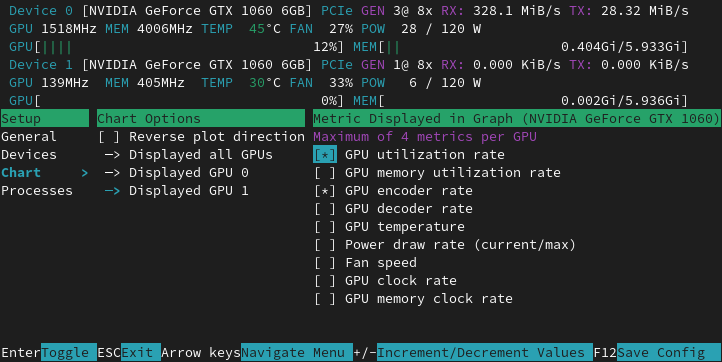

##atop

https://www.digitalocean.com/community/tutorials/atop-command-in-linux

In [ ]:
!sudo apt install atop

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cron
Suggested packages:
  anacron logrotate checksecurity default-mta | mail-transport-agent
The following NEW packages will be installed:
  atop cron
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 253 kB of archives.
After this operation, 761 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 cron amd64 3.0pl1-137ubuntu3 [73.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 atop amd64 2.7.1-1 [180 kB]
Fetched 253 kB in 1s (396 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (

To display all the process-level use of the system’s resources, we can simply run 'atop' in the terminal.

In [ ]:
!atop #requires terminal to display

>

In [ ]:
#The memory-based output of the atop command
!atop -m

>

Disk-specific output using the atom command in Linux: `atop -d`

## Streaming Multiprocessor

A streaming multiprocessor (SM) roughly equals a CPU core. The SM used by T4 is illustrated in :numref:`fig_gpu_sm`.

![A streaming multiprocessor in Tesla T4](http://tvm.d2l.ai/_images/gpu_sm.svg)
:label:`fig_gpu_sm`

As can be seen, an SM is partitioned into 4 processing blocks. In each block, there are 16 arithmetic units (AU) for processing float32 numbers, which are also called FP32 CUDA cores.
In total, an SM has 64 FP32 AUs, which are able to execute 64 float32 operators (e.g. FMA) in each time. Besides the register files and the instruction loader/decoders, an SM has 8 tensor cores. Each tensor core is able to execute a $4\times 4$ float16 (or int8/int4) matrix product in each time. So each one, we can call it FP16 AU, counts for $2\times 4^3=128$ operators per clock. It is worth noting that in this chapter we won't use the tensor core. We will talk about utilizing it in the later chapter.

Another difference is that the SM only has an L1 cache, which is similar to CPU's L1 cache. However, we can use this storage as a shared memory for all threads running on the SM. We know that the cache is controlled by both hardware and operating system, while we can explicitly allocate and reclaim space on the shared memory, which gives us more flexibility to do performance optimization.

## GPU Architecture

Our Tesla T4 card contains 40 SMs with a 6MB L2 cache shared by all SMs. It also ships with 16GB high-bandwidth memory (GDDR6) that is connected to the processor. The overall architecture is illustrated in :numref:`fig_gpu_t4`.

![The Tesla T4 Architecture](http://tvm.d2l.ai/_images/gpu_t4.svg)
:label:`fig_gpu_t4`

More broadly, we compare the specification difference between the CPU and GPUs used in this book in :numref:`tab_cpu_gpu_compare`, where GPUs includes
[Tesla P100](https://images.nvidia.com/content/pdf/tesla/whitepaper/pascal-architecture-whitepaper.pdf) (used in Colab),
[Tesla V100](https://images.nvidia.com/content/volta-architecture/pdf/volta-architecture-whitepaper.pdf) (equipped in Amazon EC2 P3 instance),
and [Tesla T4](https://www.nvidia.com/content/dam/en-zz/Solutions/design-visualization/technologies/turing-architecture/NVIDIA-Turing-Architecture-Whitepaper.pdf) (equipped in Amazon EC2 G4 instance).

:Compare the commonly used CPUs and GPUs, `x` means not supported. \ $^*$: Tesla P100 processes FP16 using FP32 CUDA cores.

|Hardware | Intel E5-2686 v4 | Tesla P100 | Tesla V100 | Tesla T4 |
|------|------|------|------|------|
| Clock rate (GHz) | **3** | 1.48 | 1.53 | 1.59 |
| # cores | 16 | 56 | **80** | 40 |
| # FP64 AUs per core | 4 | **32** | **32** | x |
| # FP32 AUs per core | 8 | **64** | **64** | **64** |
| # FP16 AUs per core | x | x$^*$ | **8** | **8** |
| cache per core (KB) | **320** | 64 | 128 | 64 |
| shared cache (MB)| **45** | 4 | 6 | 6 |
| Memory (GB) | **240** | 16 | 16 | 16 |
| Max memory bandwidth (GB/sec) | 72 | 732 | **900** | 300 |
| FP64 TFLOPS | 0.38 | 4.7 | **7.8** | x |
| FP32 TFLOPS | 0.77 | 9.3 | **15.7** | 8.1 |
| FP16 TFLOPS | x | 18.7 | **125.3** | 65 |
:label:`tab_cpu_gpu_compare`


## NVCC

NVCC stands for NVIDIA CUDA Compiler Driver. It is a proprietary compiler provided by NVIDIA for use with CUDA (Compute Unified Device Architecture).

The compilation trajectory for CUDA applications involves several steps, including splitting, compilation, preprocessing, and merging for each CUDA source file.
NVCC serves the purpose of hiding the intricate details of CUDA compilation from developers.

It accepts conventional compiler options (such as macros, include/library paths, and steering compilation) and translates them to appropriate host compiler command line options.
During compilation, it separates device functions (which run on the GPU) from host code (which runs on the CPU) and handles the entire compilation process

NVCC processes CUDA source files, which consist of a mixture of conventional C++ host code and GPU device functions.
It compiles device functions using proprietary NVIDIA compilers and assemblers.

Host code is compiled using a C++ host compiler (such as GCC, Intel C++ Compiler, or Microsoft Visual C++ Compiler).
The compiled GPU functions are embedded as fatbinary images in the host object file.

During linking, specific CUDA runtime libraries are added to support remote SPMD procedure calling and GPU manipulation (e.g., memory allocation, data transfer)

NVCC is based on the widely used LLVM open-source compiler infrastructure.

Developers can create or extend programming languages with support for GPU acceleration using the NVIDIA Compiler SDK

In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
%%writefile hello_c.c
#include <stdio.h>
#include <unistd.h>
void c_hello(){
    printf("Hello World!\n");
}

int main() {
    c_hello();
    return 0;
}

Overwriting hello_c.c


In [ ]:
!nvcc hello_c.c -o hello

In [ ]:
!./hello

Hello World!


In [ ]:
%%writefile hello_c.cu
#include <stdio.h>
#include <unistd.h>

__global__ void cuda_hello(){
    printf("Hello World from GPU!\n");
}

int main() {
    cuda_hello<<<1,1>>>();
    cudaDeviceSynchronize();
    return 0;
}

Overwriting hello_c.cu


The major difference between C and CUDA implementation is __global__ specifier and <<<...>>> syntax. The __global__ specifier indicates a function that runs on device (GPU). Such function can be called through host code, e.g. the main() function in the example, and is also known as "kernels".

When a kernel is called, its execution configuration is provided through <<<...>>> syntax, e.g. cuda_hello<<<1,1>>>(). In CUDA terminology, this is called "kernel launch".

In [ ]:
!nvcc hello_c.cu -o hello_c

In [ ]:
!./hello_c

Hello World from GPU!


In [ ]:
%%writefile hello2.cu
#include <stdio.h>

__global__ void helloCUDA(float f)
{
    printf("Hello thread %d, f=%f\n", threadIdx.x, f);
}

int main()
{
    helloCUDA<<<1, 5>>>(1.2345f);
    cudaDeviceSynchronize();
    return 0;
}

Writing hello2.cu


In [ ]:
!nvcc hello2.cu -o hello2

In [ ]:
!./hello2

Hello thread 0, f=1.234500
Hello thread 1, f=1.234500
Hello thread 2, f=1.234500
Hello thread 3, f=1.234500
Hello thread 4, f=1.234500


CUDA C++ provides a simple path for users familiar with the C++ programming language to easily write programs for execution by the device.

It consists of a minimal set of extensions to the C++ language and a runtime library.

The core language extensions have been introduced in Programming Model. They allow programmers to define a kernel as a C++ function and use some new syntax to specify the grid and block dimension each time the function is called. A complete description of all extensions can be found in C++ Language Extensions. Any source file that contains some of these extensions must be compiled with nvcc as outlined in Compilation with NVCC: https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#compilation-with-nvcc

Kernels can be written using the CUDA instruction set architecture, called PTX, which is described in the PTX reference manual. It is however usually more effective to use a high-level programming language such as C++. In both cases, kernels must be compiled into binary code by nvcc to execute on the device.

nvcc is a compiler driver that simplifies the process of compiling C++ or PTX code: It provides simple and familiar command line options and executes them by invoking the collection of tools that implement the different compilation stages. This section gives an overview of nvcc workflow and command options. A complete description can be found in the nvcc user manual.

## CUDA Runtime

CUDA Runtime (https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#cuda-c-runtime) provides C and C++ functions that execute on the host to allocate and deallocate device memory, transfer data between host memory and device memory, manage systems with multiple devices, etc. A complete description of the runtime can be found in the CUDA reference manual.

The runtime is built on top of a lower-level C API, the CUDA driver API, which is also accessible by the application. The driver API provides an additional level of control by exposing lower-level concepts such as CUDA contexts - the analogue of host processes for the device - and CUDA modules - the analogue of dynamically loaded libraries for the device. Most applications do not use the driver API as they do not need this additional level of control and when using the runtime, context and module management are implicit, resulting in more concise code. As the runtime is interoperable with the driver API, most applications that need some driver API features can default to use the runtime API and only use the driver API where needed. The driver API is introduced in Driver API (https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#driver-api) and fully described in the reference manual.

## nvcc4jupyter

In [ ]:
!pip install nvcc4jupyter #https://github.com/andreinechaev/nvcc4jupyter

In [ ]:
%load_ext nvcc4jupyter


Detected platform "Colab". Running its setup...
Source files will be saved in "/tmp/tmphdr4c9yi".


use the cuda cell magic command to run a simple hello world program.

In [ ]:
%%cuda
#include <stdio.h>

__global__ void hello(){
    printf("Hello from block: %u, thread: %u\n", blockIdx.x, threadIdx.x);
}

int main(){
    hello<<<2, 2>>>();
    cudaDeviceSynchronize();
}

Hello from block: 0, thread: 0
Hello from block: 0, thread: 1
Hello from block: 1, thread: 0
Hello from block: 1, thread: 1



#**C++ Cuda**





##**Basic C++**


In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main() {
  cout << "Hello, World!" << std::endl;
  return 0;
}

Hello, World!



Single-line comments start with two forward slashes (//).

Any text between // and the end of the line is ignored by the compiler (will not be executed).





In [ ]:
%%cuda
/* hellow wors
sdfdf
*/
#include <iostream>
using namespace std; // it used for explaination

int main() {
  cout << "Goodbye, World!" << std::endl;
  return 0;
}

Goodbye, World!



We will use cin to get user input.

.cin is a predefined variable that reads data from the keyboard with the extraction operator (>>).

In [ ]:
%%cuda

#include <iostream>
using namespace std; // it used for explaination

int main() {
  int x=0;
cout << "Type a number: "; // Type a number and press enter
cin >> x; // Get user input from the keyboard
cout << "Your number is: " << x; // Display the input value
}

Type a number: Your number is: 0



**Data types**

C++ provides a rich set of built-in as well as user defined data types. Following table lists down seven basic C++ data types:

**Built-in**
- Boolean - boolean - either true or false (Size 4 bytes).
- Integers - whole numbers which can be both positive and negative. Defined using char, int.(Size 4 bytes)
- Floating point numbers - real numbers (numbers with - fractions). Defined using float and double (Size 4 bytes)
- Double - Stores Fractional numbers.Containing one or more decimals (size 8 bytes )
- Char - Stores a Single Characters
Valueless using the void keyword
Wide character using the wchar_t keyword(Size 1 bytes)

**Typdefs**
Typedefs allow for creating new names (think of them as aliases) for existing types. Following is the simple syntax to define a new type using typedef:

**Defining variables**
For numbers, we will usually use the type int, which an integer in the size of a "word" the default number size of the machine which your program is compiled on. On most computers today, it is a 32-bit number, which means the number can range from -2,147,483,648 to 2,147,483,647 (same as long).

To define the variables foo and bar, we need to use the following syntax:

int foo;

int bar = 1;

The variable foo can be used, but since we did not initialize it, we don't know what's in it. The variable bar contains the number 1.

Now, we can do some math. Assuming a, b, c, d, and e are variables, we can simply use plus, minus and multiplication operators in the following notation, and assign a new value to a:

int a = 0, b = 1, c = 2, d = 3, e = 4;

a = b - c + d * e;

cout << a << endl; // will print 1-2+3*4 = 11



In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main() {
  int a = 3;
  float b = 4.5;
  double c = 5.25;
  double sum;

  /* Your code goes here */
    sum =a+b+c;

  cout << "The sum of a, b, and c is " << sum << endl;
  return 0;
}


The sum of a, b, and c is 12.75



In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main () {
  int myNum = 1000;
  cout << myNum;
  return 0;
}



1000


In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    float mynumb=2.25;
    cout <<mynumb;
    return 0;
}


2.25


In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    double mynumb=66.87;
    cout <<mynumb;
    return 0;

}


66.87


In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    double mynumb=66.87;
    cout <<mynumb+4;
    return 0;

}


70.87



Strings are used for storing text.

A string variable contains a collection of characters surrounded by double quotes


In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    string shahzad = "hello";
    cout << shahzad;
    return 0;
}


hello



Arithmetic operators are used to perform common mathematical operations.

.(+)  (Addition) 	(Adds together two values)  	(x + y)

.(-) 	(Subtraction)	(Subtracts one value from another)	(x - y)

.(*) (Multiplication) 	(Multiplies two values) 	(x * y)

.(/) 	(Division) 	(Divides one value by another) 	(x / y)

.(%) 	(Modulus) 	(Returns the division remainder) 	(x % y)

.(++) 	(Increment) 	(Increases the value of a variable by 1) 	(++x)

.(--) 	(Decrement) 	(Decreases the value of a variable by 1) 	(--x)

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    int a = 7;
    int b = 6;
    int resultplus;
    resultplus=a+b;
    int resultminus;
    resultminus=a-b;
    int resultmultiplaction;
    resultmultiplaction=a*b;
    int resultdivision;
    resultdivision=a/b;
    cout <<"additiona+b="<<resultplus<<endl;
    cout <<"minusa-b="<<resultminus<<endl;
    cout <<"resultmultiplactiona*b="<<resultmultiplaction<<endl;
    cout <<"divisiona/b="<<resultdivision<<endl;
    return 0;
}


additiona+b=13
minusa-b=1
resultmultiplactiona*b=42
divisiona/b=1




Assignment operators are used to assign values to variables.

In the example below, we use the assignment operator (=) to assign the value 10 to a variable called x:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    int a; // this is definition of assignment
    a = 2; //
    cout <<a<<endl;
    return 0;
}

2




Comparison operators are used to compare two values.

Note: The return value of a comparison is either true (1) or false (0).

In the following example, we use the greater than operator (>) to find out if 5 is greater than 3:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    int a =5;
    int b =4;
    cout <<(a>b)<<endl;
    return 0;
}


1




Logical operators are used to determine the logic between variables or values:



In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    int a=3;
    int b=5;
    cout <<(a>3 && a<7)<<endl; // returns true (1) because 3 is greater than 2 AND 2 is less than 3
    cout <<(b>3 || b<4)<<endl; // returns true (1) because one of the conditions are true (5 is greater than 3, but 5 is not less than 4)
    return 0;
}


0
1



## **C++ Math**
C++ has many functions that allows you to perform mathematical tasks on numbers.



The max(x,y) function can be used to find the highest value of x and y:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    int a;
    a = 2;
    int b;
    b = 5;
    cout <<max(a,b)<<endl; // this function is used to find max value between two
    // value
    cout <<min(a,b)<<endl; // this function is used to find min values beteen
   // two  value
    return 0;
}


5
2



Other functions, such as sqrt (square root), round (rounds a number) and log (natural logarithm), can be found in the <cmath> header file:


In [ ]:
%%cuda
#include <iostream>
#include <cmath>
using namespace std;

int main(){
    int a;
    a = 4;
    int b;
    b = -2;
    cout <<"square value of a="<<sqrt(a)<<endl; // sqrt function is used to find squar root of varia
    cout <<"absolate vale of b="<<abs(b)<<endl;
}




square value of a=2
absolate vale of b=2



C++ has a bool data type, which can take the values true (1) or false (0).



In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    bool a =true;
    bool b =false;
    cout <<a<<endl;
    cout <<b<<endl;
    return 0;
}


1
0




A Boolean expression is a C++ expression that returns a boolean value: 1 (true) or 0 (false).

You can use a comparison operator, such as the greater than (>) operator to find out if an expression (or a variable) is true:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
           int a;
           a = 2;
           int b;
           b = 1;
           cout <<"true and false"<<(a>b)<<endl;
           return 0;
}


true and false1



##C++ Conditions and Loops
C++ supports the usual logical conditions from mathematics:

- Less than: a < b
- Less than or equal to: a <= b
- Greater than: a > b
- Greater than or equal to: a >= b
- Equal to a == b
- Not Equal to: a != b
- You can use these conditions to perform different actions for different decisions.

C++ has the following conditional statements:

- Use if to specify a block of code to be executed, if a specified condition is true
- Use else to specify a block of code to be executed, if the same condition is false
- Use else if to specify a new condition to test, if the first condition is false
- Use switch to specify many alternative blocks of code to be executed



Use the if statement to specify a block of C++ code to be executed if a condition is true.

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    if (5>10) {
        cout <<"20 is greater than 10"<<endl;
    }
    cout <<"main body exution"<<endl;
    return 0;
}


main body exution




Use the else statement to specify a block of code to be executed if the condition is false.

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main() {
  int time = 20;
  if (time < 18) {
    cout << "Good day.";
  } else {
    cout << "Good evening.";
  }
  return 0;
}


Good evening.



Use the else if statement to specify a new condition if the first condition is false.

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main() {
  int time = 22;
  if (time < 10) {
    cout << "Good morning.";
  } else if (time < 20) {
    cout << "Good day.";
  } else {
    cout << "Good evening.";
  }
  return 0;
}


Good evening.



Use the switch statement to select one of many code blocks to be executed.
This is how it works:
-  The switch expression is evaluated once
- The value of the expression is compared with the values of each case
- If there is a match, the associated block of code is executed
- The break and default keywords are optional, and will be described later in this chapter

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    int day=9;
    switch(day){
     case 1:
     cout <<"monday";
     break;
     case 2:
     cout <<"tuesday";
     break;
     default:
     cout <<"no case matches";
    }
    return 0;
}


no case matches


**The break Keyword**

When C++ reaches a break keyword, it breaks out of the switch block.

This will stop the execution of more code and case testing inside the block.

When a match is found, and the job is done, it's time for a break. There is no need for more testing.

A break can save a lot of execution time because it "ignores" the execution of all the rest of the code in the switch block.

**The default Keyword**

The default keyword specifies some code to run if there is no case match:


Loops can execute a block of code as long as a specified condition is reached.

Loops are handy because they save time, reduce errors, and they make code more readable.

**While Loop**

The while loop loops through a block of code as long as a specified condition is true:


In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    int i =0;
    while (i<5){
        cout <<"shahzad"<<"\n";
        i++;
    }
    return 0;
}


shahzad
shahzad
shahzad
shahzad
shahzad




The do/while loop is a variant of the while loop.
 -This loop will execute the code block once, before checking if the condition is true, then it will repeat the loop as long as the condition is true.

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    int i =1;
    do{
       cout <<"shahzad"<<"\n";
       i++;
    }
    while(i<5);
    return 0;
}


shahzad
shahzad
shahzad
shahzad




The break statement can also be used to jump out of a loop.

This example jumps out of the loop when i is equal to 4:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
     for (int i = 0; i < 14; i++) {
         if (i == 8){
          break;
         }
    cout << i << "\n";
  }
  return 0;
}



0
1
2
3
4
5
6
7





The continue statement breaks one iteration (in the loop), if a specified condition occurs, and continues with the next iteration in the loop.

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main(){
    for (int i = 0; i < 12; i++) {
        if (i == 7){
            continue;
        }
        cout <<i<<"\n";
    }
    return 0;
}


0
1
2
3
4
5
6
8
9
10
11



##C++ Arrays
Arrays are used to store multiple values in a single variable, instead of declaring separate variables for each value.

To declare an array, define the variable type, specify the name of the array followed by square brackets and specify the number of elements it should store:

**string cars[4];**

To create an array of three integers, you could write:
**int myNum[3] = {10, 20, 30};**

**Access the Elements of an Array**

You access an array element by referring to the index number.

This statement accesses the value of the first element in cars:

string cars[4] = {"Volvo", "BMW", "Ford", "Mazda"};
cout << cars[0];
// Outputs Volvo

In [ ]:
%%cuda
#include <iostream>
#include <string>
using namespace std;

int main() {
    string Ali[4] = {"ijaz","hussain", "book", "work"};
    cout <<Ali[0];
    return 0;
}


ijaz


**Change an Array Element**

To change the value of a specific element, refer to the index number:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main() {
    string hussain[4] = {"ali","abbas","summar","ayan"};
    hussain[0]="haya";
    cout <<hussain[0];
    return 0;
}

haya




You can loop through the array elements with the for loop.

The following example outputs all elements in the cars array:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main() {
    int i;
    string ali[4] = {"shahzad","sohail","hamza","haya"};
    for( i = 0; i < 4; i++) {
        cout << i << ":" <<ali[i] << "\n";
    }
    return 0;
}

0:shahzad
1:sohail
2:hamza
3:haya





You don't have to specify the size of the array. But if you don't, it will only be as big as the elements that are inserted into it:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main() {
    int i;
    string ali[] = {"hello", "world","key","school"};
    for(i =0; i < 4; i++) {
        cout << i << ":" <<ali[i] << "\n";
    }
    return 0;
}


0:hello
1:world
2:key
3:school



## C++ References, Memory Address, and Pointers

 A reference variable is a "reference" to an existing variable, and it is created with the & operator:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main() {
    string ali = "pizza";
    string &meal = ali;

    cout << ali <<endl;
    cout << meal <<endl;
    return 0;
}


pizza
pizza



The & operator was used to create a reference variable. But it can also be used to get the memory address of a variable; which is the location of where the variable is stored on the computer.

When a variable is created in C++, a memory address is assigned to the variable. And when we assign a value to the variable, it is stored in this memory address.

To access it, use the & operator, and the result will represent where the variable is stored:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int main() {
    string food = "pizza";

    cout <<&food;
    return 0;
}


0x7ffd5837a200


We can get the memory address of a variable by using the & operator:

A pointer however, is a variable that stores the memory address as its value.


A pointer variable points to a data type (like int or string) of the same type, and is created with the * operator. The address of the variable you're working with is assigned to the pointer:

**Example explained**

Create a pointer variable with the name ptr, that points to a string variable, by using the asterisk sign * (string* ptr). Note that the type of the pointer has to match the type of the variable you're working with.

Use the & operator to store the memory address of the variable called food, and assign it to the pointer.

Now, ptr holds the value of food's memory address.

In [ ]:
%%cuda
#include <iostream>
using namespace std;
 int main(){
     string food = "pizza";
     string* ptr = &food;

     cout << food <<endl;
     cout << &food <<endl;
     cout << ptr <<endl;
     return 0;
     }


pizza
0x7ffd3b6b1e40
0x7ffd3b6b1e40



## C++ Functions

A function is a block of code which only runs when it is called.

You can pass data, known as parameters, into a function.

Functions are used to perform certain actions, and they are important for reusing code: Define the code once, and use it many times.

**Create a Function**

C++ provides some pre-defined functions, such as main(), which is used to execute code. But you can also create your own functions to perform certain actions.

To create (often referred to as declare) a function, specify the name of the function, followed by parentheses ():

**Syntax**

void myFunction() {
  // code to be executed
}

**Example Explained**

- myFunction() is the name of the function
- void means that the function does not have a return  value. You will learn more about return values later in the next chapter
- inside the function (the body), add code that defines what the function should do

**Call a Function**

Declared functions are not executed immediately. They are "saved for later use", and will be executed later, when they are called.

To call a function, write the function's name followed by two parentheses () and a semicolon ;

In the following example, myFunction() is used to print a text (the action), when it is called:

**Example**

Inside main, call myFunction():




In [ ]:
%%cuda
#include <iostream>
using namespace std;

void colab() {
    cout << "Hello Colab!";
}
int main(){
    cout <<"first output"<<endl;
    colab();
    return 0;
}


first output
Hello Colab!


**Function Declaration and Definition**

A C++ function consist of two parts:

- Declaration: the function's name, return type, and parameters (if any)
- Definition: the body of the function (code to be executed)

Note: If a user-defined function, such as myFunction() is declared after the main() function, an error will occur. It is because C++ works from top to bottom; which means that if the function is not declared above main(), the program is unaware of it:


In [ ]:
%%cuda
#include <iostream>
using namespace std;

void myFunction() {
  cout << "I just got executed!";
}


int main() {
  myFunction();
  return 0;
}


I just got executed!


Information can be passed to functions as a parameter. Parameters act as variables inside the function.

Parameters are specified after the function name, inside the parentheses. You can add as many parameters as you want, just separate them with a comma:

When a parameter is passed to the function, it is called an argument. So, from the example above: fname is a parameter, while Liam, Jenny and Anja are arguments.

In [ ]:
%%cuda
#include <iostream>
using namespace std;

void sjsu(string word) {
    cout << word <<endl;
}
    int main(){
        sjsu("school");
        sjsu("book");
        sjsu("pen");
        sjsu("sjsu");
        return 0;
    }

school
book
pen
sjsu




You can also use a default parameter value, by using the equals sign (=).

If we call the function without an argument, it uses the default value ("Norway"):

A parameter with a default value, is often known as an "optional parameter". From the example above, country is an optional parameter and "Norway" is the default value.

In [ ]:
%%cuda
#include <iostream>
using namespace std;

void shahzad(string name ="haider"){
cout << name <<endl;
}
int main(){
shahzad("haya");
shahzad("summar");
shahzad();
shahzad("ayan");
return 0;
}


haya
summar
haider
ayan




Inside the function, you can add as many parameters as you want:

Note that when you are working with multiple parameters, the function call must have the same number of arguments as there are parameters, and the arguments must be passed in the same order.

In [ ]:
%%cuda
#include <iostream>
using namespace std;

void work(string shahzad, int age) {
     cout << shahzad << " endl. " << age << " years old.endl";
}
int main(){
    work("haya",5);
    work("summar",11);
    work("mahdi",4);
    work("lahar",10);
    return 0;
}


haya endl. 5 years old.endlsummar endl. 11 years old.endlmahdi endl. 4 years old.endllahar endl. 10 years old.endl



The void keyword, used in the previous examples, indicates that the function should not return a value. If you want the function to return a value, you can use a data type (such as int, string, etc.) instead of void, and use the return keyword inside the function:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int world(int x, int y) {
    int sum = x+y;
    return sum;
}
int main(){
    int finalsum = world(5 , 7);
    cout <<finalsum<<endl;
    return 0;
}

12




With function overloading, multiple functions can have the same name with different parameters:

Instead of defining two functions that should do the same thing, it is better to overload one.

In the example below, we overload the plusFunc function to work for both int and double:

Note: Multiple functions can have the same name as long as the number and/or type of parameters are different.

In [ ]:
%%cuda
#include <iostream>
using namespace std;

int myfunction(int x, int y) {
    return  x + y;
}
double myfunction(double x, double y) {
    return x + y;
}
int main(){
    int number1 = myfunction(8 , 6);
    double number2 = myfunction(5.5 , 2.5);
    cout <<"Int: " << number1<<endl;
    cout <<"Double: " <<number2<<endl;
    return 0;
}

Int: 14
Double: 8



## C++ OOP

**C++ What is OOP?**

OOP stands for Object-Oriented Programming.

Procedural programming is about writing procedures or functions that perform operations on the data, while object-oriented programming is about creating objects that contain both data and functions.

Object-oriented programming has several advantages over procedural programming:

- OOP is faster and easier to execute
- OOP provides a clear structure for the programs
- OOP helps to keep the C++ code DRY "Don't Repeat Yourself", and makes the code easier to maintain, modify and debug
- OOP makes it possible to create full reusable applications with less code and shorter development time.



Classes and objects are the two main aspects of object-oriented programming.

Look at the following illustration to see the difference between class and objects:

So, a class is a template for objects, and an object is an instance of a class.

When the individual objects are created, they inherit all the variables and functions from the class.

You will learn much more about classes and objects in the next chapter.

![](https://drive.google.com/uc?export=view&id=1OiI0OM8SZDffAmtpczf56BYziR6f_b2T)


 C++ is an object-oriented programming language.

Everything in C++ is associated with classes and objects, along with its attributes and methods. For example: in real life, a car is an object. The car has attributes, such as weight and color, and methods, such as drive and brake.

Attributes and methods are basically variables and functions that belongs to the class. These are often referred to as "class members".

A class is a user-defined data type that we can use in our program, and it works as an object constructor, or a "blueprint" for creating objects.

**Create a Class**
To create a class, use the class keyword:
Create a class called "MyClass":

```bash
class MyClass {       // The class
  public:             // Access specifier
    int myNum;        // Attribute (int variable)
    string myString;  // Attribute (string variable)
};
```


**Example explained**
- The class keyword is used to create a class called MyClass.
- The public keyword is an access specifier, which specifies that members (attributes and methods) of the class are accessible from outside the class. You will learn more about access specifiers later.

- Inside the class, there is an integer variable myNum and a string variable myString. When variables are declared within a class, they are called attributes.

- At last, end the class definition with a semicolon ;.


In C++, an object is created from a class. We have already created the class named MyClass, so now we can use this to create objects.

To create an object of MyClass, specify the class name, followed by the object name.

To access the class attributes (myNum and myString), use the dot syntax (.) on the object:

**Example**
Create an object called "myObj" and access the attributes:


In [ ]:
%%cuda
#include <iostream>
using namespace std;

class MyClass {       //  class
  public:             //  specifier
    int myNum;        // Attribute (int )
    string myString;  // Attribute (string)
};

int main() {
  MyClass myObj;  //  object of MyClass

  // Access attributes and set values
  myObj.myNum = 70;
  myObj.myString = "colab";

  // Print values
  cout << myObj.myNum <<endl;
  cout << myObj.myString <<endl;
  return 0;
}


70
colab




You can create multiple objects of one class:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

class car {
    public:
    string brand;
    string model;
    int year;
};

int main(){
    car carobj1;
    carobj1.brand = "BMW";
    carobj1.model = "vvt";
    carobj1.year = 2002;

    car carobj2;
    carobj2.brand = "toyota";
    carobj2.model = "vvtr";
    carobj2.year = 2006;

    cout << carobj1.brand << " " << carobj1.model << " " << carobj1.year <<endl;
    cout << carobj2.brand << " " <<carobj2.model << " " << carobj2.year <<endl;
    return 0;
}

BMW vvt 2002
toyota vvtr 2006




Methods are functions that belongs to the class.

There are two ways to define functions that belongs to a class:

- Inside class definition
- Outside class definition

In the following example, we define a function inside the class, and we name it "myMethod".

**Note**: You access methods just like you access attributes; by creating an object of the class and by using the dot syntax (.):

**inside**

In [ ]:
%%cuda
#include <iostream>
using namespace std;

class colab {
    public:
    void mymethod() {
        cout <<"colab people";
    }
    };
    int main() {
        colab myobj;
        myobj.mymethod();
        return 0;
    }


colab people


**0utside example**

In [ ]:
%%cuda
#include <iostream>
using namespace std;

class myclass {
    public:
    void mymethod();
};
void myclass::mymethod(){
    cout << "colab";
}
 int main(){
     myclass myobj;
     myobj.mymethod();
     return 0;
 }

colab




A constructor in C++ is a special method that is automatically called when an object of a class is created.

To create a constructor, use the same name as the class, followed by parentheses ():

In [ ]:
%%cuda
#include <iostream>
using namespace std;

class myclass {     // class
  public:           //  specifier
    myclass() {     // Constructor
      cout << "Hello World!";
    }
};

int main() {
  myclass myObj;    // this will call the constructor
  return 0;
}


Hello World!



Constructors can also take parameters (just like regular functions), which can be useful for setting initial values for attributes.

The following class have brand, model and year attributes, and a constructor with different parameters. Inside the constructor we set the attributes equal to the constructor parameters (brand=x, etc). When we call the constructor (by creating an object of the class), we pass parameters to the constructor, which will set the value of the corresponding attributes to the same:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

class Car {        //  class
  public:          //  specifier
    string brand;  // Attribute
    string model;  // Attribute
    int year;      // Attribute
    Car(string x, string y, int z) {  // Constructor with parameters
      brand = x;
      model = y;
      year = z;
    }
};

int main() {
  // Create Car objects and call the constructor with different values
  Car carObj1("toyota", "vvt", 2006);
  Car carObj2("honda", "vvtr", 2012);

  // Print values
  cout << carObj1.brand << " " << carObj1.model << " " << carObj1.year << endl;
  cout << carObj2.brand << " " << carObj2.model << " " << carObj2.year << endl;
  return 0;
}


toyota vvt 2006
honda vvtr 2012




The public keyword is an access specifier. Access specifiers define how the members (attributes and methods) of a class can be accessed. In the example above, the members are public - which means that they can be accessed and modified from outside the code.

However, what if we want members to be private and hidden from the outside world?

In C++, there are three access specifiers:

- public - members are accessible from outside the class
- private - members cannot be accessed (or viewed) from outside the class
- protected - members cannot be accessed from outside the class, however, they can be accessed in inherited classes. You will learn more about Inheritance later.

In the following example, we demonstrate the differences between public and private members:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

class myclass{     // class
    public:        // public acccess specifier
    int x;         // attributes
    private:      // private access specifier
    int y;         // attributes

};

int main() {
  myclass myObj;
  myObj.x = 90;
  //myObj.y = 60;
  return 0;
}




 The meaning of Encapsulation, is to make sure that "sensitive" data is hidden from users. To achieve this, you must declare class variables/attributes as private (cannot be accessed from outside the class). If you want others to read or modify the value of a private member, you can provide public get and set methods.

 **Access Private Members**


To access a private attribute, use public "get" and "set" methods:

**Example explained**
The salary attribute is private, which have restricted access.

The public setSalary() method takes a parameter (s) and assigns it to the salary attribute (salary = s).

The public getSalary() method returns the value of the private salary attribute.

Inside main(), we create an object of the Employee class. Now we can use the setSalary() method to set the value of the private attribute to 50000. Then we call the getSalary() method on the object to return the value.

In [ ]:
%%cuda
#include <iostream>
using namespace std;

class Employee {
  private:
    int salary;

  public:
    void setSalary(int s) {
      salary = s;
    }
    int getSalary() {
      return salary;
    }
};

int main() {
  Employee myObj;
  myObj.setSalary(20000);
  cout << myObj.getSalary();
  return 0;
}


20000



In C++, it is possible to inherit attributes and methods from one class to another. We group the "inheritance concept" into two categories:

- derived class (child) - the class that inherits from another class
- base class (parent) - the class being inherited from
To inherit from a class, use the : symbol.

In the example below, the Car class (child) inherits the attributes and methods from the Vehicle class (parent):

In [ ]:
%%cuda
#include <iostream>
using namespace std;

// Base class
class Vehicle {
  public:
    string brand = "toyota";
    void honk() {
      cout << "Tuut, tuut"<<endl;
    }
};

// Derived class
class Car: public Vehicle {
  public:
    string model = "Mustang";
};

int main() {
  Car myCar;
  myCar.honk();
  cout << myCar.brand + " " + myCar.model;
  return 0;
}



Tuut, tuut
toyota Mustang



 class can also be derived from one class, which is already derived from another class.

In the following example, MyGrandChild is derived from class MyChild (which is derived from MyClass)

In [ ]:
%%cuda
#include <iostream>
using namespace std;

// Parent class
class MyClass {
  public:
    void myFunction() {
      cout << "Some content in parent class." ;
    }
};

// Child class
class MyChild: public MyClass {
};

// Grandchild class
class MyGrandChild: public MyChild {
};

int main() {
  MyGrandChild myObj;
  myObj.myFunction();
  return 0;
}


Some content in parent class.



A class can also be derived from more than one base class, using a comma-separated list:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

class myclass {
    public:
    void myfunction() {
        cout <<"shahzad hussain"<<endl;
    }
};
class myotherclass {
    public:
    void myotherfunction(){
        cout <<"pakistan"<<endl;
    }
};
class mychildclass:public myclass,public myotherclass{

};
int main() {
    mychildclass myobj;
    myobj.myfunction();
    myobj.myotherfunction();
    return 0;
}

shahzad hussain
pakistan




The third specifier, protected, is similar to private, but it can also be accessed in the inherited class:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

// Base class
class Employee  {
  protected:  // Protected access specifier
    int salary;
};

// Derived class
class Programmer: public Employee {
  public:
    int bonus;
    void setSalary(int s) {
      salary = s;
    }
    int getSalary() {
      return salary;
    }
};

int main() {
  Programmer myObj;
  myObj.setSalary(70000);
  myObj.bonus = 1500;
  cout << "Salary: " << myObj.getSalary() << "\n";
  cout << "Bonus: " << myObj.bonus << "\n";
  return 0;
}


Salary: 70000
Bonus: 1500




Polymorphism means "many forms", and it occurs when we have many classes that are related to each other by inheritance.

Inheritance lets us inherit attributes and methods from another class. Polymorphism uses those methods to perform different tasks. This allows us to perform a single action in different ways.

For example, think of a base class called Animal that has a method called animalSound(). Derived classes of Animals could be Pigs, Cats, Dogs, Birds - And they also have their own implementation of an animal sound (the pig oinks, and the cat meows, etc.):

Now we can create Pig and Dog objects and override the animalSound() method:

In [ ]:
%%cuda
#include <iostream>
using namespace std;

class animal{
    public:
    void animalsound(){
        cout <<"animal make a sound"<<endl;
    }
};
class pig:public animal{
    public:
    void animalsound(){
        cout <<"sound of wildforest"<<endl;
    }
};
class dog: public animal{
    public:
    void animalsound(){
        cout <<"sound of gangal"<<endl;
    }
};

int main(){
    animal myanimal;
    pig mypig;
    dog mydog;

    myanimal.animalsound();
    mypig.animalsound();
    mydog.animalsound();
    return 0;

}

animal make a sound
sound of wildforest
sound of gangal



# CUDA C++

https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#

## from C to Cuda C

For data to be accessible by GPU, it must be presented in the device memory. CUDA provides APIs for allocating device memory and data transfer between host and device memory. Following is the common workflow of CUDA programs.

* Allocate host memory and initialized host data
* Allocate device memory
* Transfer input data from host to device memory
* Execute kernels
* Transfer output from device memory to host

CUDA provides several functions for allocating device memory. The most common ones are cudaMalloc() and cudaFree().

* `cudaMalloc(void **devPtr, size_t count)`: cudaMalloc() allocates memory of size count in the device memory and updates the device pointer devPtr to the allocated memory.
* `cudaFree(void *devPtr)`: cudaFree() deallocates a region of the device memory where the device pointer devPtr points to.
They are comparable to malloc() and free() in C

Transfering data between host and device memory can be done through cudaMemcpy function, which is similar to memcpy in C. The syntax of cudaMemcpy is as follow:
`cudaMemcpy(void *dst, void *src, size_t count, cudaMemcpyKind kind)`, the value of kind is either cudaMemcpyHostToDevice or cudaMemcpyDeviceToHost

### Examples

In [ ]:
%%cu
#include <cstdio>
#include <iostream>

using namespace std;

__global__ void maxi(int* a, int* b, int n)
{
	int block = 256 * blockIdx.x;
	int max = 0;

	for (int i = block; i < min(256 + block, n); i++) {

		if (max < a[i]) {
			max = a[i];
		}
	}
	b[blockIdx.x] = max;
}

int main()
{

	int n;
	n = 3 >> 2;
	int a[n];

	for (int i = 0; i < n; i++) {
		a[i] = rand() % n;
		cout << a[i] << "\t";
	}

	cudaEvent_t start, end;
	int *ad, *bd;
	int size = n * sizeof(int);
	cudaMalloc(&ad, size);
	cudaMemcpy(ad, a, size, cudaMemcpyHostToDevice);
	int grids = ceil(n * 1.0f / 256.0f);
	cudaMalloc(&bd, grids * sizeof(int));

	dim3 grid(grids, 1);
	dim3 block(1, 1);

	cudaEventCreate(&start);
	cudaEventCreate(&end);
	cudaEventRecord(start);

	while (n > 1) {
		maxi<<<grids, block>>>(ad, bd, n);
		n = ceil(n * 1.0f / 256.0f);
		cudaMemcpy(ad, bd, n * sizeof(int), cudaMemcpyDeviceToDevice);
	}

	cudaEventRecord(end);
	cudaEventSynchronize(end);

	float time = 0;
	cudaEventElapsedTime(&time, start, end);

	int ans[2];
	cudaMemcpy(ans, ad, 4, cudaMemcpyDeviceToHost);

	cout << "The maximum element is : " << ans[0] << endl;

	cout << "The time required : ";
	cout << time << endl;
}


In [ ]:
%%cu

#include <stdio.h>

// This is a special function that runs on the GPU (device) instead of the CPU (host)
__global__ void kernel() {
  printf("Hello world!\n");
}

int main() {
  // Invoke the kernel function on the GPU with one block of one thread
  kernel<<<1,1>>>();

  // Check for error codes (remember to do this for _every_ CUDA function)
  if(cudaDeviceSynchronize() != cudaSuccess) {
    fprintf(stderr, "CUDA Error: %s\n", cudaGetErrorString(cudaPeekAtLastError()));
  }
  return 0;
}

In [ ]:
%%cu

#include <stdio.h>

// This kernel runs on the GPU and prints the thread's identifiers
__global__ void kernel() {
  printf("Hello from block %d thread %d\n", blockIdx.x, threadIdx.x);
}

int main() {
  // Launch the kernel on the GPU with four blocks of six threads each
  kernel<<<4,6>>>();

  // Check for CUDA errors
  if(cudaDeviceSynchronize() != cudaSuccess) {
    fprintf(stderr, "CUDA Error: %s\n", cudaGetErrorString(cudaPeekAtLastError()));
  }
  return 0;
}

In [ ]:
%%cu

#include <stdint.h>
#include <stdio.h>

#define N 32
#define THREADS_PER_BLOCK 32

__global__ void saxpy(float a, float* x, float* y) {
  // Which index of the array should this thread use?
  size_t index = 20;

  // Compute a times x plus y for a specific index
  y[index] = a * x[index] + y[index];
}

int main() {
  // Allocate arrays for X and Y on the CPU. This memory is only usable on the CPU
  float* cpu_x = (float*)malloc(sizeof(float) * N);
  float* cpu_y = (float*)malloc(sizeof(float) * N);

  // Initialize X and Y
  int i;
  for(i=0; i<N; i++) {
    cpu_x[i] = (float)i;
    cpu_y[i] = 0.0;
  }

  // The gpu_x and gpu_y pointers will only be usable on the GPU (which uses separate memory)
  float* gpu_x;
  float* gpu_y;

  // Allocate space for the x array on the GPU
  if(cudaMalloc(&gpu_x, sizeof(float) * N) != cudaSuccess) {
    fprintf(stderr, "Failed to allocate X array on GPU\n");
    exit(2);
  }

  // Allocate space for the y array on the GPU
  if(cudaMalloc(&gpu_y, sizeof(float) * N) != cudaSuccess) {
    fprintf(stderr, "Failed to allocate Y array on GPU\n");
    exit(2);
  }

  // Copy the cpu's x array to the gpu with cudaMemcpy
  if(cudaMemcpy(gpu_x, cpu_x, sizeof(float) * N, cudaMemcpyHostToDevice) != cudaSuccess) {
    fprintf(stderr, "Failed to copy X to the GPU\n");
  }

  // Copy the cpu's y array to the gpu with cudaMemcpy
  if(cudaMemcpy(gpu_y, cpu_y, sizeof(float) * N, cudaMemcpyHostToDevice) != cudaSuccess) {
    fprintf(stderr, "Failed to copy Y to the GPU\n");
  }

  // Calculate the number of blocks to run, rounding up to include all threads
  size_t blocks = (N + THREADS_PER_BLOCK - 1) / THREADS_PER_BLOCK;

  // Run the saxpy kernel
  saxpy<<<blocks, THREADS_PER_BLOCK>>>(0.5, gpu_x, gpu_y);

  // Wait for the kernel to finish
  if(cudaDeviceSynchronize() != cudaSuccess) {
    fprintf(stderr, "CUDA Error: %s\n", cudaGetErrorString(cudaPeekAtLastError()));
  }

  // Copy the y array back from the gpu to the cpu
  if(cudaMemcpy(cpu_y, gpu_y, sizeof(float) * N, cudaMemcpyDeviceToHost) != cudaSuccess) {
    fprintf(stderr, "Failed to copy Y from the GPU\n");
  }

  // Print the updated y array
  for(i=0; i<N; i++) {
    printf("%d: %f\n", i, cpu_y[i]);
  }

  cudaFree(gpu_x);
  cudaFree(gpu_y);
  free(cpu_x);
  free(cpu_y);

  return 0;
}


## Programming model

The Graphics Processing Unit (GPU) provides much higher instruction throughput and memory bandwidth than the CPU within a similar price and power envelope. Many applications leverage these higher capabilities to run faster on the GPU than on the CPU. Other computing devices, like FPGAs, are also very energy efficient, but offer much less programming flexibility than GPUs.

This difference in capabilities between the GPU and the CPU exists because they are designed with different goals in mind. While the CPU is designed to excel at executing a sequence of operations, called a thread, as fast as possible and can execute a few tens of these threads in parallel, the GPU is designed to excel at executing thousands of them in parallel (amortizing the slower single-thread performance to achieve greater throughput).

The GPU is specialized for highly parallel computations and therefore designed such that more transistors are devoted to data processing rather than data caching and flow control.

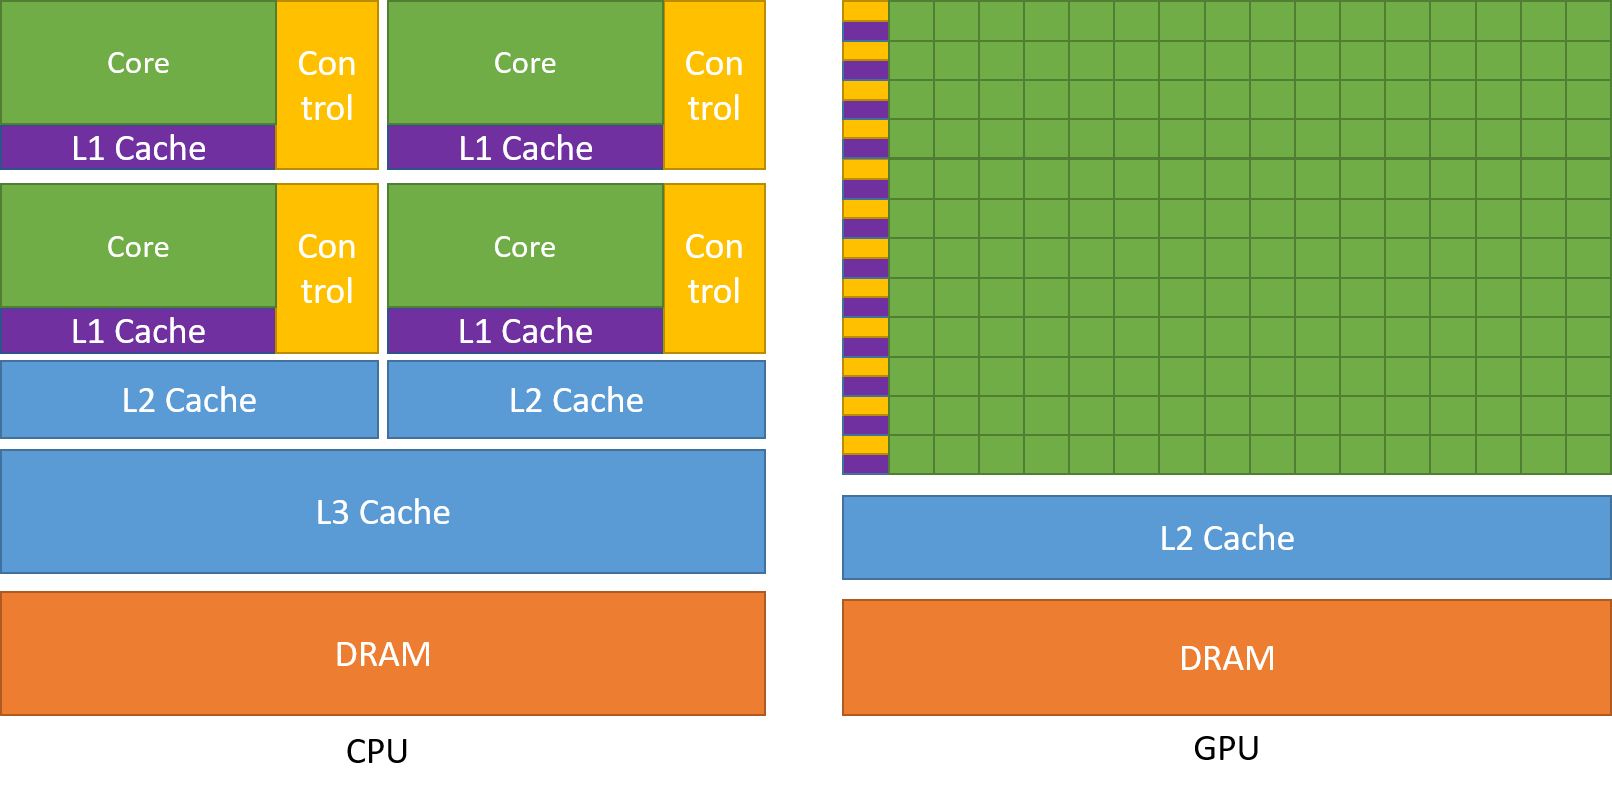

Devoting more transistors to data processing, for example, floating-point computations, is beneficial for highly parallel computations; the GPU can hide memory access latencies with computation, instead of relying on large data caches and complex flow control to avoid long memory access latencies, both of which are expensive in terms of transistors.

In general, an application has a mix of parallel parts and sequential parts, so systems are designed with a mix of GPUs and CPUs in order to maximize overall performance. Applications with a high degree of parallelism can exploit this massively parallel nature of the GPU to achieve higher performance than on the CPU.

The advent of multicore CPUs and manycore GPUs means that mainstream processor chips are now parallel systems. The challenge is to develop application software that transparently scales its parallelism to leverage the increasing number of processor cores, much as 3D graphics applications transparently scale their parallelism to manycore GPUs with widely varying numbers of cores.

The CUDA parallel programming model is designed to overcome this challenge while maintaining a low learning curve for programmers familiar with standard programming languages such as C.

At its core are three key abstractions — a hierarchy of **thread groups**, **shared memories**, and **barrier synchronization** — that are simply exposed to the programmer as a minimal set of language extensions.

These abstractions provide fine-grained data parallelism and thread parallelism, nested within coarse-grained data parallelism and task parallelism. They guide the programmer to partition the problem into coarse sub-problems that can be solved independently in parallel by blocks of threads, and each sub-problem into finer pieces that can be solved cooperatively in parallel by all threads within the block.

CUDA C++ extends C++ by allowing the programmer to define C++ functions, called kernels, that, when called, are executed N times in parallel by N different CUDA threads, as opposed to only once like regular C++ functions.

A kernel is defined using the __global__ declaration specifier and the number of CUDA threads that execute that kernel for a given kernel call is specified using a new <<<...>>>execution configuration syntax. Each thread that executes the kernel is given a unique thread ID that is accessible within the kernel through built-in variables.


the CUDA programming model assumes that the CUDA threads execute on a physically separate device that operates as a coprocessor to the host running the C++ program. This is the case, for example, when the kernels execute on a GPU and the rest of the C++ program executes on a CPU.

The CUDA programming model also assumes that both the host and the device maintain their own separate memory spaces in DRAM, referred to as host memory and device memory, respectively. Therefore, a program manages the global, constant, and texture memory spaces visible to kernels through calls to the CUDA runtime (described in Programming Interface). This includes device memory allocation and deallocation as well as data transfer between host and device memory.

Unified Memory provides managed memory to bridge the host and device memory spaces. Managed memory is accessible from all CPUs and GPUs in the system as a single, coherent memory image with a common address space. This capability enables oversubscription of device memory and can greatly simplify the task of porting applications by eliminating the need to explicitly mirror data on host and device. See Unified Memory Programming for an introduction to Unified Memory.

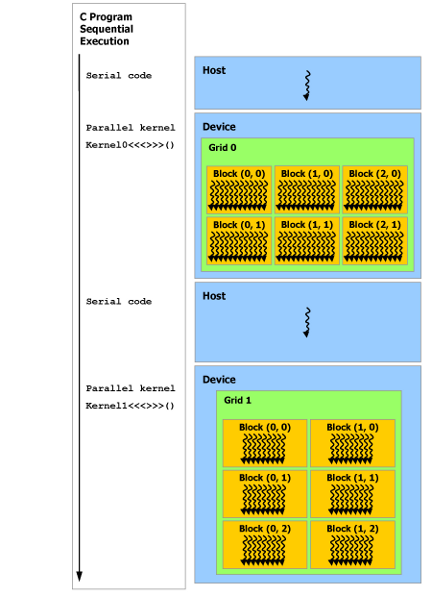

In the CUDA programming model a thread is the lowest level of abstraction for doing a computation or a memory operation.

## Threads

CUDA use a kernel execution configuration <<<...>>> to tell CUDA runtime how many threads to launch on GPU. CUDA organizes threads into a group called "thread block". Kernel can launch multiple thread blocks, organized into a "grid" structure.

The syntax of kernel execution configuration is as follows: `<<< M , T >>>`, Which indicate that a kernel launches with a grid of M thread blocks. Each thread block has T parallel threads.

CUDA provides built-in variables for accessing thread information.
* `threadIdx.x` contains the index of the thread within the block
* `blockDim.x` contains the size of thread block (number of threads in the thread block).

For the `vector_add()` configuration, the value of `threadIdx.x` ranges from 0 to 255 and the value of `blockDim.x` is 256.

With 256 threads, the addition can be spread across threads and computed simultaneously. For the k-th thread, the loop starts from k-th element and iterates through the array with a loop stride of 256. For example, in the 0-th iteration, the k-th thread computes the addition of k-th element. In the next iteration, the k-th thread computes the addition of (k+256)-th element, and so on.

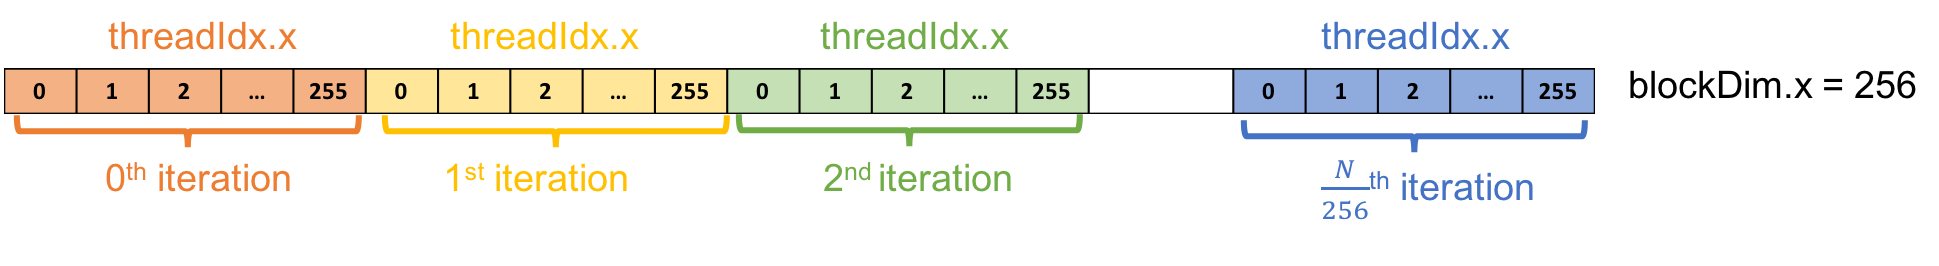

In [ ]:
%%cuda
#include <iostream>

// Kernel definition
__global__ void VecAdd(float* A, float* B, float* C)
{
    //each thread can determine its unique index using built-in variables like threadIdx.x
    int i = threadIdx.x; //threadIdx.x provides a way to differentiate and address individual threads within a thread block during parallel execution on a GPU
    C[i] = A[i] + B[i];
}

int main()
{
    const int N = 10; // Example: Number of elements in the vectors

    // Allocate memory for vectors A, B, and C on the host (CPU)
    float* A = new float[N];
    float* B = new float[N];
    float* C = new float[N];

    // Initialize vectors A and B (you can fill them with actual data)
    for (int i = 0; i < N; ++i)
    {
        A[i] = i * 2.0f;
        B[i] = i * 1.5f;
    }

    // Allocate memory for vectors A, B, and C on the device (GPU)
    float* d_A, *d_B, *d_C;
    cudaMalloc(&d_A, N * sizeof(float));
    cudaMalloc(&d_B, N * sizeof(float));
    cudaMalloc(&d_C, N * sizeof(float));

    // Copy data from host to device
    cudaMemcpy(d_A, A, N * sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, B, N * sizeof(float), cudaMemcpyHostToDevice);

    // Kernel invocation with N threads
    //1 represents the number of blocks in the grid (1D grid).
    //N represents the number of threads per block.
    VecAdd<<<1, N>>>(d_A, d_B, d_C);

    // Copy result back from device to host
    cudaMemcpy(C, d_C, N * sizeof(float), cudaMemcpyDeviceToHost);

    // Print the result
    std::cout << "Result (C): ";
    for (int i = 0; i < N; ++i)
    {
        std::cout << C[i] << " ";
    }
    std::cout << std::endl;

    // Clean up
    delete[] A;
    delete[] B;
    delete[] C;
    cudaFree(d_A);
    cudaFree(d_B);
    cudaFree(d_C);

    return 0;
}


Result (C): 0 3.5 7 10.5 14 17.5 21 24.5 28 31.5 



threadIdx.x is a built-in variable in CUDA (Compute Unified Device Architecture).
It represents the thread index along the x-axis (or the first dimension) within the current thread block.
Each thread in a CUDA kernel has a unique threadIdx.x value ranging from 0 to the total number of threads in the block minus 1.
It is commonly used to access data elements or perform computations specific to a particular thread.


## Thread Hierarchy and Thread Block

For convenience, threadIdx is a 3-component vector, so that threads can be identified using a one-dimensional, two-dimensional, or three-dimensional thread index, forming a one-dimensional, two-dimensional, or three-dimensional block of threads, called a **thread block**. This provides a natural way to invoke computation across the elements in a domain such as a vector, matrix, or volume.

The index of a thread and its thread ID relate to each other in a straightforward way: For a one-dimensional block, they are the same; for a two-dimensional block of size (Dx, Dy), the thread ID of a thread of index (x, y) is (x + y Dx); for a three-dimensional block of size (Dx, Dy, Dz), the thread ID of a thread of index (x, y, z) is (x + y Dx + z Dx Dy).

In [ ]:
%%cuda
#include <iostream>

const int N = 3; // Example: Matrix size (N x N)

// Kernel definition
__global__ void MatAdd(float* A, float* B, float* C)
{
    int i = threadIdx.x;
    int j = threadIdx.y;
    int idx = i * N + j; // Flattened index for 2D matrices

    C[idx] = A[idx] + B[idx];
}

int main()
{
    // Example matrices A and B
    float A[N][N] = {{1, 2, 3}, {4, 5, 6}, {7, 8, 9}};
    float B[N][N] = {{9, 8, 7}, {6, 5, 4}, {3, 2, 1}};
    float C[N][N]; // Result matrix

    // Allocate memory for flattened matrices on the device (GPU)
    float* d_A, *d_B, *d_C;
    cudaMalloc(&d_A, N * N * sizeof(float));
    cudaMalloc(&d_B, N * N * sizeof(float));
    cudaMalloc(&d_C, N * N * sizeof(float));

    // Copy data from host to device
    cudaMemcpy(d_A, A, N * N * sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, B, N * N * sizeof(float), cudaMemcpyHostToDevice);

    // Kernel invocation with one block of N x N threads
    //creates a dim3 struct named threadsPerBlock. It specifies the number of threads in each dimension of a block. it implies a 2D block configuration.
    dim3 threadsPerBlock(N, N);
    MatAdd<<<1, threadsPerBlock>>>(d_A, d_B, d_C);

    // Copy result back from device to host
    cudaMemcpy(C, d_C, N * N * sizeof(float), cudaMemcpyDeviceToHost);

    // Print the result matrix C
    std::cout << "Result matrix C:\n";
    for (int i = 0; i < N; ++i)
    {
        for (int j = 0; j < N; ++j)
        {
            std::cout << C[i][j] << " ";
        }
        std::cout << "\n";
    }

    // Clean up
    cudaFree(d_A);
    cudaFree(d_B);
    cudaFree(d_C);

    return 0;
}



Result matrix C:
10 10 10 
10 10 10 
10 10 10 



## Streaming multiprocessor

There is a limit to the number of threads per block, since all threads of a block are expected to reside on the same streaming multiprocessor core and must share the limited memory resources of that core. On current GPUs, a thread block may contain up to 1024 threads.

However, a kernel can be executed by multiple equally-shaped thread blocks, so that the total number of threads is equal to the number of threads per block times the number of blocks.

Blocks are organized into a one-dimensional, two-dimensional, or three-dimensional grid of thread blocks. The number of thread blocks in a grid is usually dictated by the size of the data being processed, which typically exceeds the number of processors in the system.

CUDA GPUs have several parallel processors called Streaming Multiprocessors or SMs. Each SM consists of multiple parallel processors and can run multiple concurrent thread blocks. To take advantage of CUDA GPUs, kernel should be launched with multiple thread blocks.

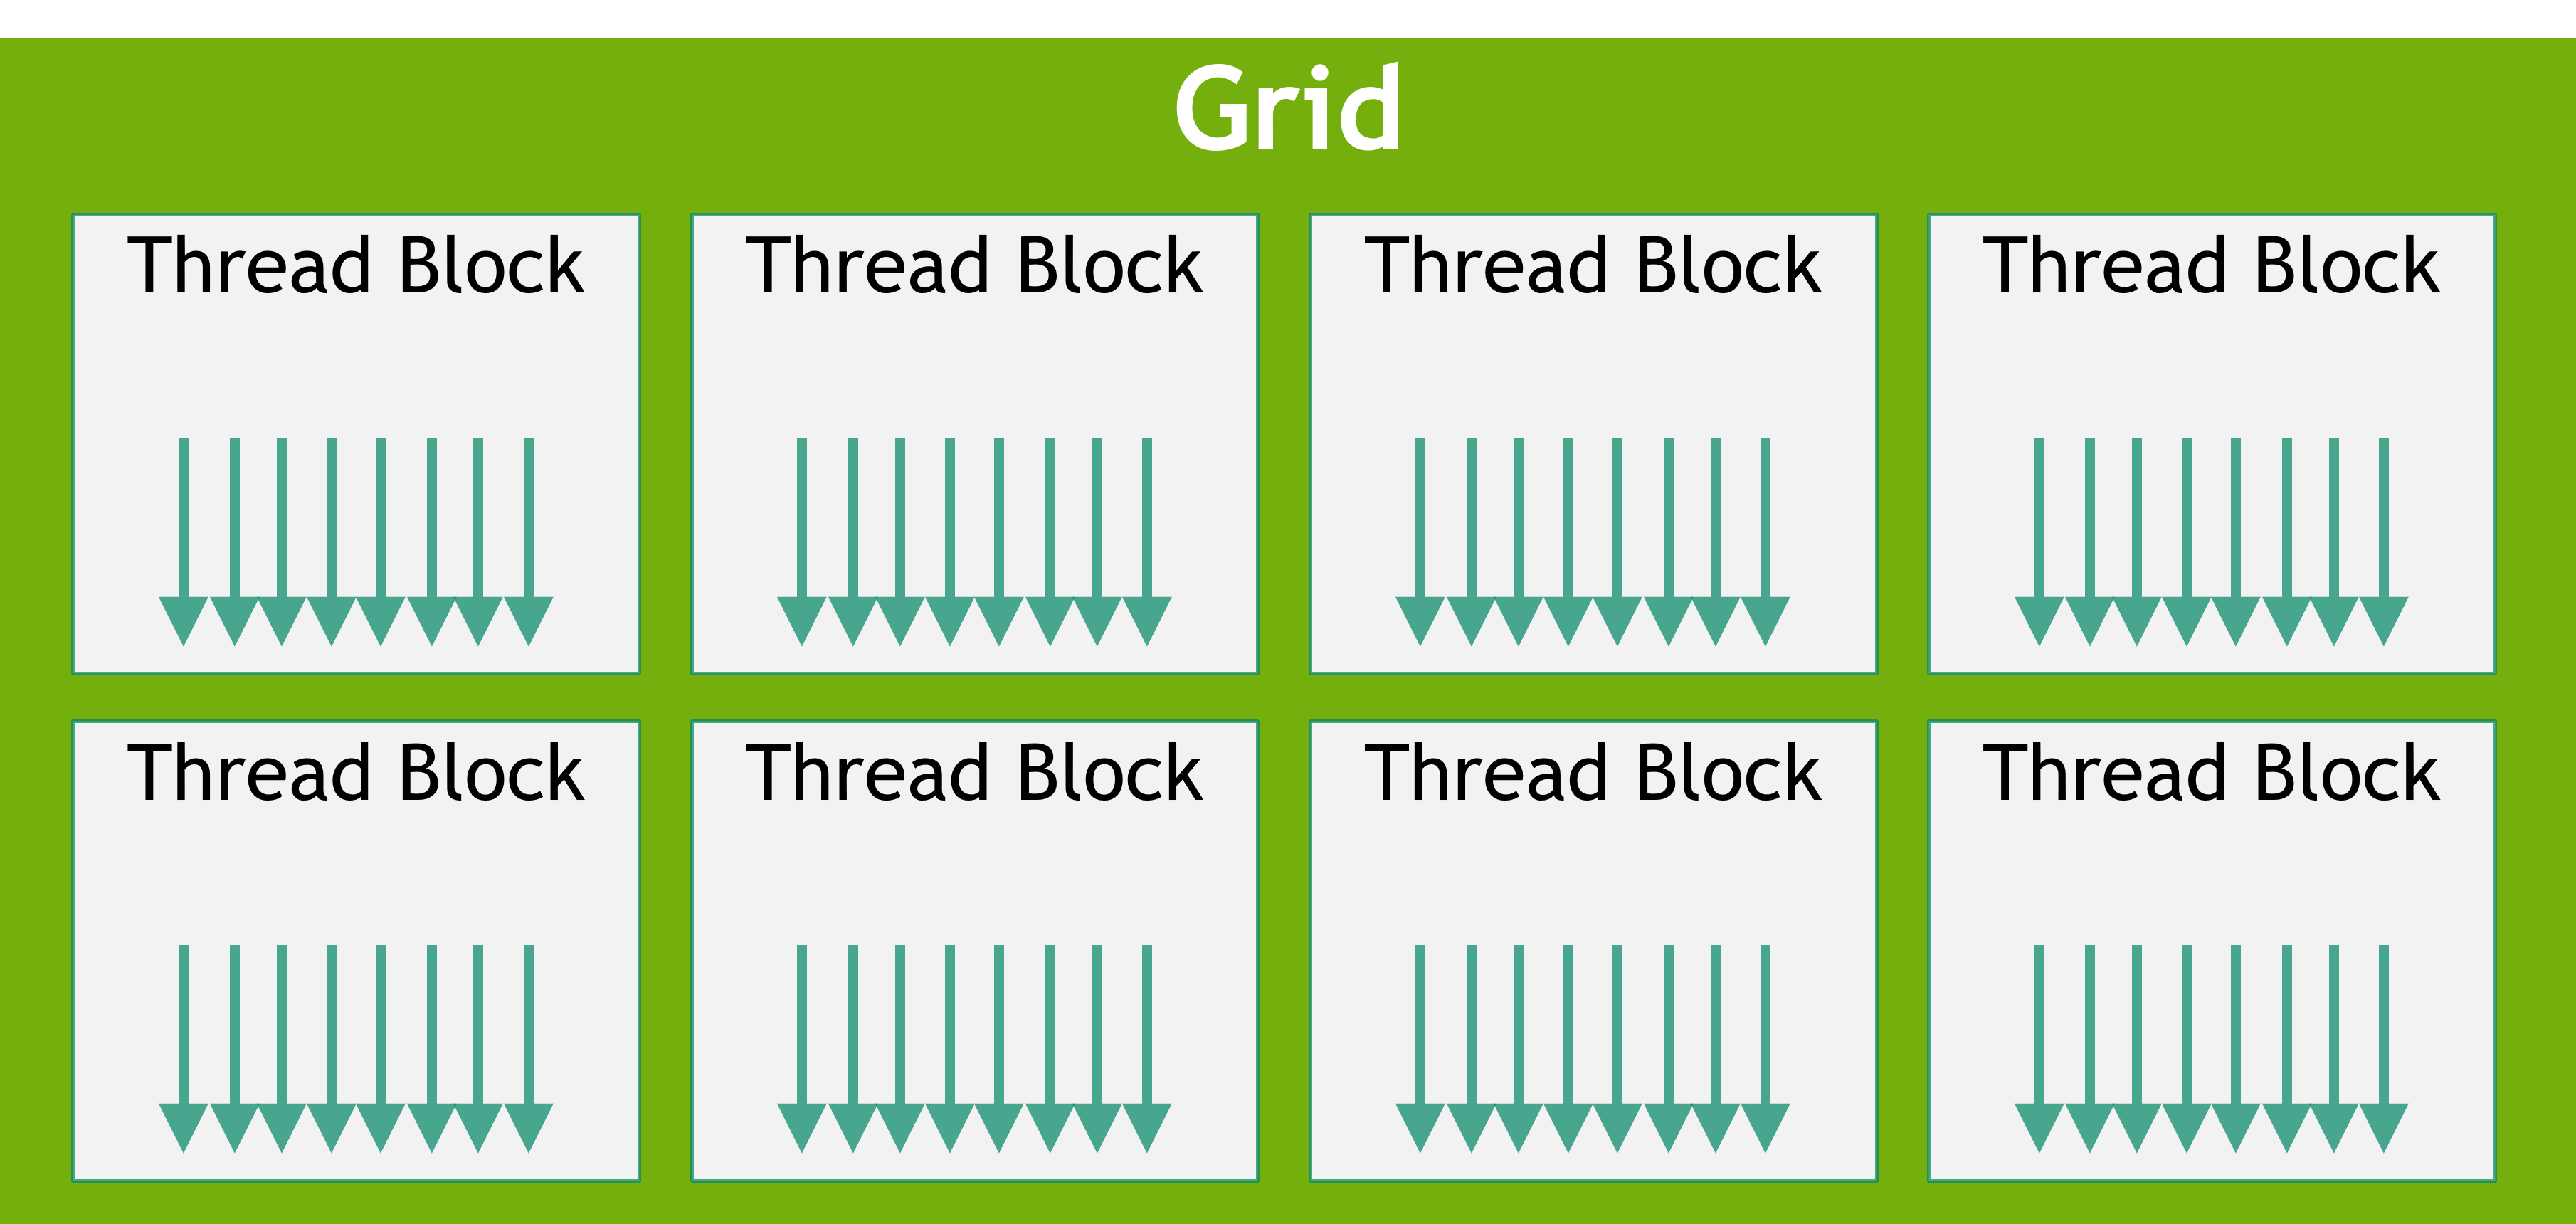

The number of threads per block and the number of blocks per grid specified in the <<<...>>> syntax can be of type int or dim3. Two-dimensional blocks or grids can be specified as in the example above.

Each block within the grid can be identified by a one-dimensional, two-dimensional, or three-dimensional unique index accessible within the kernel through the built-in blockIdx variable. The dimension of the thread block is accessible within the kernel through the built-in blockDim variable.

Similar to thread information, CUDA provides built-in variables for accessing block information: `blockIdx.x` and `gridDim.x`.
* `blockIdx.x` contains the index of the block with in the grid
* `gridDim.x` contains the size of the grid

Instead of using a thread block to iterate over the arrays, we will use multiple thread blocks to create N threads; each thread processes an element of the arrays. Following is an illustration of the parallelization idea.

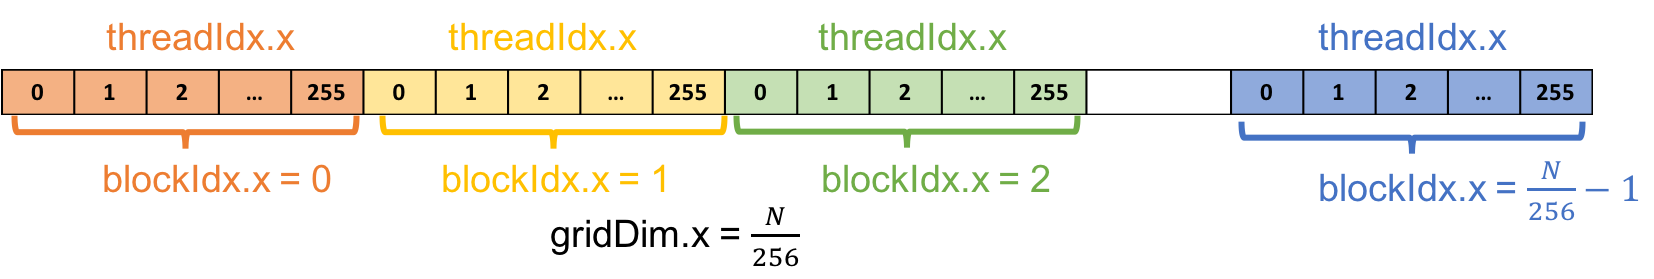

With 256 threads per thread block, we need at least N/256 thread blocks to have a total of N threads. To assign a thread to a specific element, we need to know a unique index for each thread. Such index can be computed as follow:
`int tid = blockIdx.x * blockDim.x + threadIdx.x;`

blockDim is a built-in variable representing the dimensions of a block (thread block). `blockDim.x` gives the number of threads in the x-direction within a block. It indicates how many threads are organized along the x-axis within a single block. For example, if you have a block with dimensions blockDim(8, 4, 2), then `blockDim.x` is 8

The total number of threads in the x-direction within the entire grid is given by blockDim.x * gridDim.x

In [ ]:
%%cuda
#include <iostream>

const int N = 3; // Example: Matrix size (N x N)

// Kernel definition
__global__ void MatAdd(float* A, float* B, float* C)
{
    int i = blockIdx.x * blockDim.x + threadIdx.x;
    int j = blockIdx.y * blockDim.y + threadIdx.y;
    int idx = i * N + j; // Flattened index for 2D matrices

    if (i < N && j < N)
        C[idx] = A[idx] + B[idx];
}

int main()
{
    // Example matrices A and B
    float A[N][N] = {{1, 2, 3}, {4, 5, 6}, {7, 8, 9}};
    float B[N][N] = {{9, 8, 7}, {6, 5, 4}, {3, 2, 1}};
    float C[N][N]; // Result matrix

    // Allocate memory for flattened matrices on the device (GPU)
    float* d_A, *d_B, *d_C;
    cudaMalloc(&d_A, N * N * sizeof(float));
    cudaMalloc(&d_B, N * N * sizeof(float));
    cudaMalloc(&d_C, N * N * sizeof(float));

    // Copy data from host to device
    cudaMemcpy(d_A, A, N * N * sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, B, N * N * sizeof(float), cudaMemcpyHostToDevice);

    // Kernel invocation with multiple blocks
    dim3 threadsPerBlock(16, 16);
    dim3 numBlocks((N + threadsPerBlock.x - 1) / threadsPerBlock.x,
                   (N + threadsPerBlock.y - 1) / threadsPerBlock.y);
    MatAdd<<<numBlocks, threadsPerBlock>>>(d_A, d_B, d_C);

    // Copy result back from device to host
    cudaMemcpy(C, d_C, N * N * sizeof(float), cudaMemcpyDeviceToHost);

    // Print the result matrix C
    std::cout << "Result matrix C:\n";
    for (int i = 0; i < N; ++i)
    {
        for (int j = 0; j < N; ++j)
        {
            std::cout << C[i][j] << " ";
        }
        std::cout << "\n";
    }

    // Clean up
    cudaFree(d_A);
    cudaFree(d_B);
    cudaFree(d_C);

    return 0;
}




Result matrix C:
10 10 10 
10 10 10 
10 10 10 



A thread block size of 16x16 (256 threads), although arbitrary in this case, is a common choice. The grid is created with enough blocks to have one thread per matrix element as before. For simplicity, this example assumes that the number of threads per grid in each dimension is evenly divisible by the number of threads per block in that dimension, although that need not be the case.

Thread blocks are required to execute independently: It must be possible to execute them in any order, in parallel or in series. This independence requirement allows thread blocks to be scheduled in any order across any number of cores, enabling programmers to write code that scales with the number of cores.

Threads within a block can cooperate by sharing data through some shared memory and by synchronizing their execution to coordinate memory accesses.

## Thread Block Clusters

With the introduction of NVIDIA Compute Capability 9.0, the CUDA programming model introduces an optional level of hierarchy called Thread Block Clusters that are made up of thread blocks. Similar to how threads in a thread block are guaranteed to be co-scheduled on a streaming multiprocessor, thread blocks in a cluster are also guaranteed to be co-scheduled on a GPU Processing Cluster (GPC) in the GPU.

Similar to thread blocks, clusters are also organized into a one-dimension, two-dimension, or three-dimension. The number of thread blocks in a cluster can be user-defined, and a maximum of 8 thread blocks in a cluster is supported as a portable cluster size in CUDA. Note that on GPU hardware or MIG configurations which are too small to support 8 multiprocessors the maximum cluster size will be reduced accordingly. Identification of these smaller configurations, as well as of larger configurations supporting a thread block cluster size beyond 8, is architecture-specific and can be queried using the cudaOccupancyMaxPotentialClusterSize API.

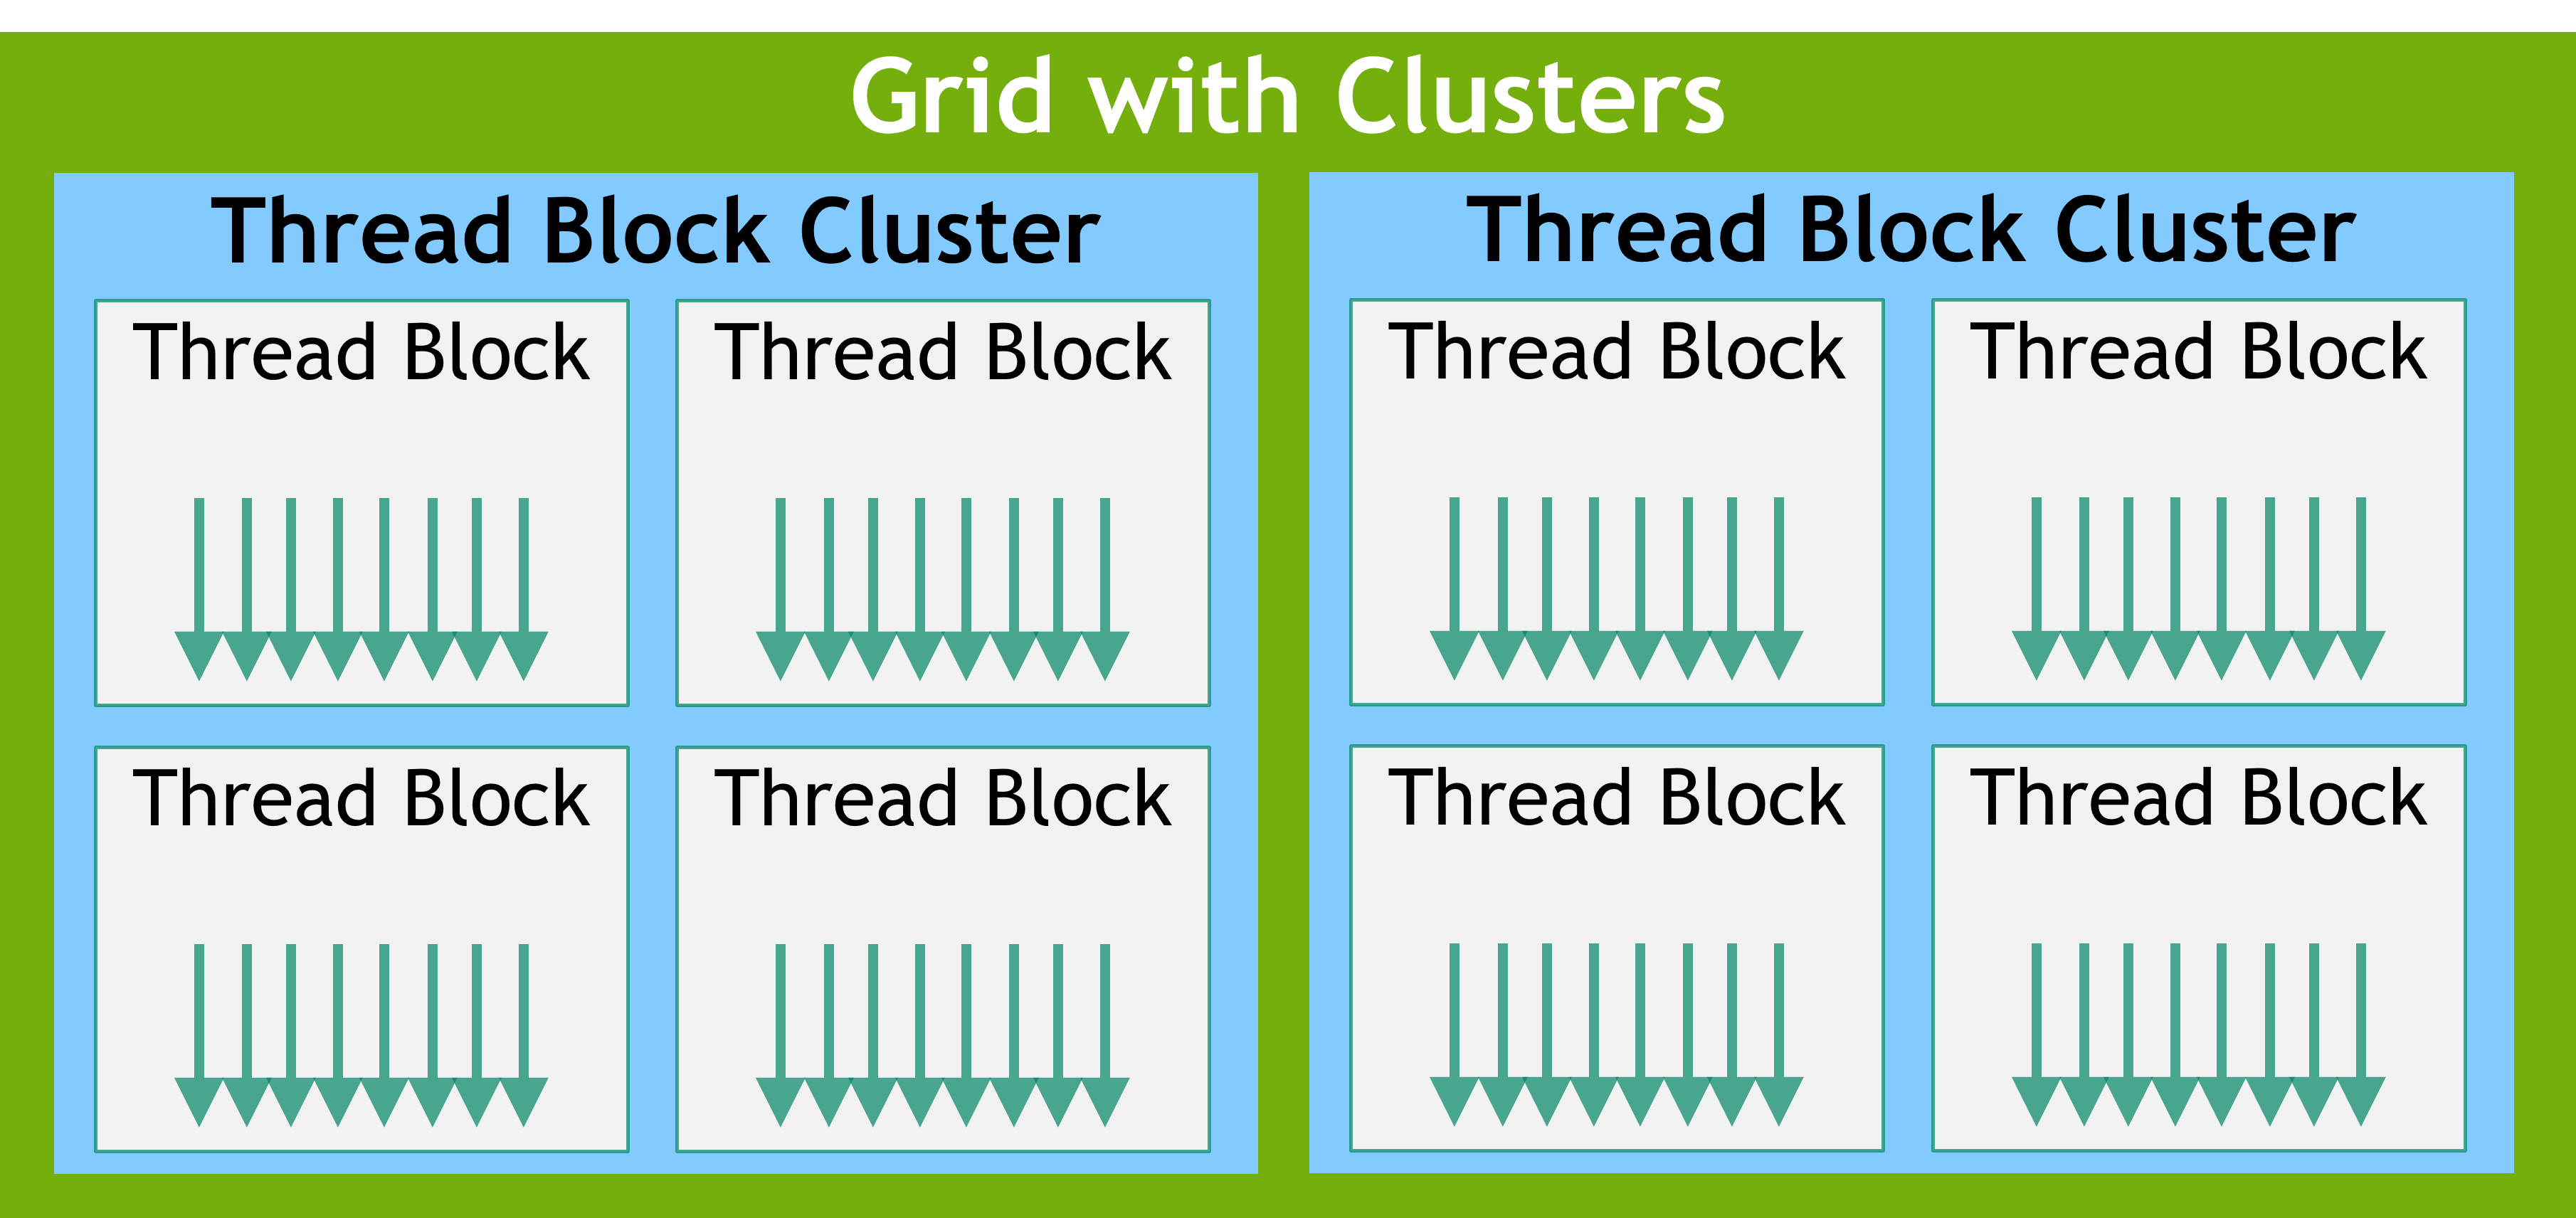

The kernel calculates a global thread ID (tid) based on the block and thread indices.
* blockIdx.x represents the index of the current block (block ID).
* blockDim.x represents the number of threads per block (block dimension).
* threadIdx.x represents the index of the current thread within the block.
* The global thread ID is computed as (blockIdx.x * blockDim.x) + threadIdx.x

In [ ]:
%%cuda
// This program computes the sum of two vectors of length N
#include <algorithm>
#include <cassert>
#include <iostream>
#include <vector>

// CUDA kernel for vector addition
// __global__ means this is called from the CPU, and runs on the GPU
// In C99, the restrict keyword was introduced to specify that two pointers passed as function arguments do not overlap (i.e., they don’t point to the same memory).
//The __restrict keyword serves a similar purpose but is not part of the C++ standard.
// c is the output array where the result of the vector addition will be stored.
__global__ void vectorAdd(const int *__restrict a, const int *__restrict b,
                          int *__restrict c, int N) {
  // Calculate global thread ID
  int tid = (blockIdx.x * blockDim.x) + threadIdx.x;

  // Boundary check
  if (tid < N) c[tid] = a[tid] + b[tid];
}

// Check vector add result
void verify_result(std::vector<int> &a, std::vector<int> &b,
                   std::vector<int> &c) {
  for (int i = 0; i < a.size(); i++) {
    assert(c[i] == a[i] + b[i]);
  }
}

int main() {
  // Array size of 2^16 (65536 elements)
  constexpr int N = 1 << 16;
  constexpr size_t bytes = sizeof(int) * N;

  // Vectors for holding the host-side (CPU-side) data
  std::vector<int> a;
  a.reserve(N);
  std::vector<int> b;
  b.reserve(N);
  std::vector<int> c;
  c.reserve(N);

  // Initialize random numbers in each array
  for (int i = 0; i < N; i++) {
    a.push_back(rand() % 100);
    b.push_back(rand() % 100);
  }

  // Allocate memory on the device
  int *d_a, *d_b, *d_c;
  cudaMalloc(&d_a, bytes);
  cudaMalloc(&d_b, bytes);
  cudaMalloc(&d_c, bytes);

  // Copy data from the host to the device (CPU -> GPU)
  cudaMemcpy(d_a, a.data(), bytes, cudaMemcpyHostToDevice);
  cudaMemcpy(d_b, b.data(), bytes, cudaMemcpyHostToDevice);

  // Threads per CTA (1024)
  int NUM_THREADS = 1 << 10;

  // CTAs per Grid
  // We need to launch at LEAST as many threads as we have elements
  // This equation pads an extra CTA to the grid if N cannot evenly be divided
  // by NUM_THREADS (e.g. N = 1025, NUM_THREADS = 1024)
  int NUM_BLOCKS = (N + NUM_THREADS - 1) / NUM_THREADS;

  // Launch the kernel on the GPU
  // Kernel calls are asynchronous (the CPU program continues execution after
  // call, but no necessarily before the kernel finishes)
  vectorAdd<<<NUM_BLOCKS, NUM_THREADS>>>(d_a, d_b, d_c, N);

  // Copy sum vector from device to host
  // cudaMemcpy is a synchronous operation, and waits for the prior kernel
  // launch to complete (both go to the default stream in this case).
  // Therefore, this cudaMemcpy acts as both a memcpy and synchronization
  // barrier.
  cudaMemcpy(c.data(), d_c, bytes, cudaMemcpyDeviceToHost);

  // Check result for errors
  verify_result(a, b, c);

  // Free memory on device
  cudaFree(d_a);
  cudaFree(d_b);
  cudaFree(d_c);

  std::cout << "COMPLETED SUCCESSFULLY\n";

  return 0;
}

COMPLETED SUCCESSFULLY



## Allocate Pinned Memory

Pinned memory has some important characteristics:
It remains resident in physical memory (not swapped out to disk), which can improve data transfer performance between the CPU and GPU.
It is accessible by both the CPU and GPU without explicit data transfers.
However, it consumes more memory resources and may have limitations on the total amount of pinned memory available.

Pinned memory is commonly used in CUDA applications for efficient data transfer between the CPU and GPU.
For example, if you plan to transfer data frequently between the host and device (GPU), using pinned memory can reduce overhead.

In [ ]:
%%cuda
#include <algorithm>
#include <cassert>
#include <cstdlib>
#include <iostream>
#include <iterator>
#include <vector>

using std::begin;
using std::copy;
using std::cout;
using std::end;
using std::generate;
using std::vector;

// CUDA kernel for vector addition
// __global__ means this is called from the CPU, and runs on the GPU
__global__ void vectorAdd(int* a, int* b, int* c, int N) {
  // Calculate global thread ID
  int tid = (blockIdx.x * blockDim.x) + threadIdx.x;

  // Boundary check
  if (tid < N) {
    // Each thread adds a single element
    c[tid] = a[tid] + b[tid];
  }
}

// Check vector add result
void verify_result(int *a, int *b, int *c, int N) {
  for (int i = 0; i < N; i++) {
    assert(c[i] == a[i] + b[i]);
  }
}

int main() {
  // Array size of 2^16 (65536 elements)
  constexpr int N = 1 << 26;
  size_t bytes = sizeof(int) * N;

  // Vectors for holding the host-side (CPU-side) data
  int *h_a, *h_b, *h_c;

  // Allocate pinned memory
  cudaMallocHost(&h_a, bytes);
  cudaMallocHost(&h_b, bytes);
  cudaMallocHost(&h_c, bytes);

  // Initialize random numbers in each array
  for(int i = 0; i < N; i++){
    h_a[i] = rand() % 100;
    h_b[i] = rand() % 100;
  }

  // Allocate memory on the device
  int *d_a, *d_b, *d_c;
  cudaMalloc(&d_a, bytes);
  cudaMalloc(&d_b, bytes);
  cudaMalloc(&d_c, bytes);

  // Copy data from the host to the device (CPU -> GPU)
  cudaMemcpy(d_a, h_a, bytes, cudaMemcpyHostToDevice);
  cudaMemcpy(d_b, h_b, bytes, cudaMemcpyHostToDevice);

  // Threads per CTA (1024 threads per CTA)
  int NUM_THREADS = 1 << 10;

  // CTAs per Grid
  // We need to launch at LEAST as many threads as we have elements
  // This equation pads an extra CTA to the grid if N cannot evenly be divided
  // by NUM_THREADS (e.g. N = 1025, NUM_THREADS = 1024)
  int NUM_BLOCKS = (N + NUM_THREADS - 1) / NUM_THREADS;

  // Launch the kernel on the GPU
  // Kernel calls are asynchronous (the CPU program continues execution after
  // call, but no necessarily before the kernel finishes)
  vectorAdd<<<NUM_BLOCKS, NUM_THREADS>>>(d_a, d_b, d_c, N);

  // Copy sum vector from device to host
  // cudaMemcpy is a synchronous operation, and waits for the prior kernel
  // launch to complete (both go to the default stream in this case).
  // Therefore, this cudaMemcpy acts as both a memcpy and synchronization
  // barrier.
  cudaMemcpy(h_c, d_c, bytes, cudaMemcpyDeviceToHost);

  // Check result for errors
  verify_result(h_a, h_b, h_c, N);

  // Free pinned memory
  cudaFreeHost(h_a);
  cudaFreeHost(h_b);
  cudaFreeHost(h_c);

  // Free memory on device
  cudaFree(d_a);
  cudaFree(d_b);
  cudaFree(d_c);

  cout << "COMPLETED SUCCESSFULLY\n";

  return 0;
}

COMPLETED SUCCESSFULLY



## Unified Memory

**Unified Memory** in CUDA is an essential feature that simplifies memory management and data sharing between the CPU and GPU. Let's dive into what it is and how it works:

1. **What Is Unified Memory?**
   - Unified Memory provides a **single, unified virtual address space** for accessing both CPU and GPU memory in a system¹.
   - It bridges the gap between the CPU and GPU memory, making it easier to allocate and manage data that can be used by code running on any processor.

2. **Key Points:**
   - **Single Address Space**: With Unified Memory, you don't need separate memory allocations for CPU and GPU. Instead, you allocate memory once, and it becomes accessible from both sides.
   - **Automatic Data Migration**: The system automatically migrates data between CPU and GPU as needed. When a processor accesses data not currently in its memory, the migration occurs transparently.
   - **Page Faulting**: If a processor accesses a page of memory that isn't currently resident in its memory, a page fault occurs, triggering data migration.
   - **Improved Productivity**: Developers can focus on writing code without worrying about explicit data transfers between CPU and GPU.

3. **How It Works (Pascal GPUs and Later):**
   - Pascal GPUs (such as the NVIDIA Titan X and Tesla P100) introduced hardware support for Unified Memory.
   - Features include:
     - **49-bit Virtual Addressing**: GPUs can access the entire system memory and memory of all GPUs in the system.
     - **On-Demand Page Migration**: Data is migrated between CPU and GPU memory as needed¹.

4. **Benefits:**
   - **Simplified Code**: No need to explicitly manage data transfers; the system handles it.
   - **Flexibility**: Allocate memory once and use it seamlessly across CPU and GPU.
   - **Performance**: While migration incurs some overhead, it's often outweighed by the productivity gains.

5. **Usage Example**:
   - Instead of using `cudaMalloc` for GPU memory allocation, you can use `cudaMallocManaged`. This allocates a single pointer accessible by either the GPU or CPU⁴.

References:
[1]: https://developer.nvidia.com/blog/unified-memory-cuda-beginners/
[2]: https://developer.nvidia.com/blog/cuda-8-features-revealed/
[3]: https://developer.nvidia.com/blog/unified-memory-in-cuda-6/
[4]: https://www.nextplatform.com/2019/01/24/unified-memory-the-final-piece-of-the-gpu-programming-puzzle/
[5]: https://developer.nvidia.com/blog/maximizing-unified-memory-performance-cuda/

(1) Unified Memory for CUDA Beginners | NVIDIA Technical Blog. https://developer.nvidia.com/blog/unified-memory-cuda-beginners/.
(2) Unified Memory: The Final Piece Of The GPU Programming Puzzle. https://www.nextplatform.com/2019/01/24/unified-memory-the-final-piece-of-the-gpu-programming-puzzle/.
(3) CUDA 8 Features Revealed | NVIDIA Technical Blog. https://developer.nvidia.com/blog/cuda-8-features-revealed/.
(4) Unified Memory in CUDA 6 | NVIDIA Technical Blog. https://developer.nvidia.com/blog/unified-memory-in-cuda-6/.
(5) Maximizing Unified Memory Performance in CUDA. https://developer.nvidia.com/blog/maximizing-unified-memory-performance-cuda/.
(6) en.wikipedia.org. https://en.wikipedia.org/wiki/CUDA.

In [ ]:
%%cuda
// This program computer the sum of two N-element vectors using unified memory
#include <stdio.h>
#include <cassert>
#include <iostream>

using std::cout;

// CUDA kernel for vector addition
// No change when using CUDA unified memory
__global__ void vectorAdd(int *a, int *b, int *c, int N) {
  // Calculate global thread thread ID
  int tid = (blockDim.x * blockIdx.x) + threadIdx.x;

  // Boundary check
  if (tid < N) {
    c[tid] = a[tid] + b[tid];
  }
}

int main() {
  // Array size of 2^16 (65536 elements)
  const int N = 1 << 16;
  size_t bytes = N * sizeof(int);

  // Declare unified memory pointers
  int *a, *b, *c;

  // Allocation memory for these pointers
  cudaMallocManaged(&a, bytes);
  cudaMallocManaged(&b, bytes);
  cudaMallocManaged(&c, bytes);

  // Initialize vectors
  for (int i = 0; i < N; i++) {
    a[i] = rand() % 100;
    b[i] = rand() % 100;
  }

  // Threads per CTA (1024 threads per CTA)
  int BLOCK_SIZE = 1 << 10;

  // CTAs per Grid
  int GRID_SIZE = (N + BLOCK_SIZE - 1) / BLOCK_SIZE;

  // Call CUDA kernel
  vectorAdd<<<GRID_SIZE, BLOCK_SIZE>>>(a, b, c, N);

  // Wait for all previous operations before using values
  // We need this because we don't get the implicit synchronization of
  // cudaMemcpy like in the original example
  cudaDeviceSynchronize();

  // Verify the result on the CPU
  for (int i = 0; i < N; i++) {
    assert(c[i] == a[i] + b[i]);
  }

  // Free unified memory (same as memory allocated with cudaMalloc)
  cudaFree(a);
  cudaFree(b);
  cudaFree(c);

  cout << "COMPLETED SUCCESSFULLY!\n";

  return 0;
}

COMPLETED SUCCESSFULLY!



##Prefetch

Prefetching is a technique used to improve memory access performance by fetching data from memory before it is actually needed. In the context of CUDA, prefetching helps hide memory latency, especially when data is transferred between the CPU (host) and the GPU (device).


**The Code Snippet:**
   ```cpp
   // Set some hints about the data and do some prefetching
   cudaMemAdvise(a, bytes, cudaMemAdviseSetPreferredLocation, cudaCpuDeviceId);
   cudaMemAdvise(b, bytes, cudaMemAdviseSetPreferredLocation, cudaCpuDeviceId);
   cudaMemPrefetchAsync(c, bytes, id);
   ```
  1. `cudaMemAdvise(a, bytes, cudaMemAdviseSetPreferredLocation, cudaCpuDeviceId);`
    - This line sets a **memory advice** for the pointer `a`.
    - The advice is to **preferentially locate the data on the CPU (host)**.
    - It informs the system that the data associated with `a` is likely to be accessed by the CPU.
  2. `cudaMemAdvise(b, bytes, cudaMemAdviseSetPreferredLocation, cudaCpuDeviceId);`
    - Similar to the previous line, this sets the same memory advice for the pointer `b`.
  3. `cudaMemPrefetchAsync(c, bytes, id);`
    - This line asynchronously **prefetches** the data associated with the pointer `c`.
    - The `bytes` parameter specifies the size of the data to prefetch.
    - The `id` parameter `int id = cudaGetDevice(&id)`, retrieve the current GPU device ID that the calling thread is associated with

References
(1) Boosting Application Performance with GPU Memory Prefetching. https://developer.nvidia.com/blog/boosting-application-performance-with-gpu-memory-prefetching/.
(2) prefetching and register memory - CUDA Programming and Performance .... https://forums.developer.nvidia.com/t/prefetching-and-register-memory/19234.
(3) Prefetching Memory in CUDA - theforce.hashnode.dev. https://theforce.hashnode.dev/prefetching-memory-in-cuda.
(4) torchtnt.utils.data.CudaDataPrefetcher — TorchTNT 0.2.1 documentation. https://pytorch.org/tnt/stable/utils/generated/torchtnt.utils.data.CudaDataPrefetcher.html.
(5) Maximizing Unified Memory Performance in CUDA. https://developer.nvidia.com/blog/maximizing-unified-memory-performance-cuda/.

In [ ]:
%%cuda
// This program computer the sum of two N-element vectors using unified memory

#include <stdio.h>
#include <cassert>
#include <iostream>

using std::cout;

// CUDA kernel for vector addition
// No change when using CUDA unified memory
__global__ void vectorAdd(int *a, int *b, int *c, int N) {
  // Calculate global thread thread ID
  int tid = (blockDim.x * blockIdx.x) + threadIdx.x;

  // Boundary check
  if (tid < N) {
    c[tid] = a[tid] + b[tid];
  }
}

int main() {
  // Array size of 2^16 (65536 elements)
  const int N = 1 << 16;
  size_t bytes = N * sizeof(int);

  // Declare unified memory pointers
  int *a, *b, *c;

  // Allocation memory for these pointers
  cudaMallocManaged(&a, bytes);
  cudaMallocManaged(&b, bytes);
  cudaMallocManaged(&c, bytes);

  // Get the device ID for prefetching calls
  int id = cudaGetDevice(&id);

  // Set some hints about the data and do some prefetching
  cudaMemAdvise(a, bytes, cudaMemAdviseSetPreferredLocation, cudaCpuDeviceId);
  cudaMemAdvise(b, bytes, cudaMemAdviseSetPreferredLocation, cudaCpuDeviceId);
  cudaMemPrefetchAsync(c, bytes, id);

  // Initialize vectors
  for (int i = 0; i < N; i++) {
    a[i] = rand() % 100;
    b[i] = rand() % 100;
  }

  // Pre-fetch 'a' and 'b' arrays to the specified device (GPU)
  cudaMemAdvise(a, bytes, cudaMemAdviseSetReadMostly, id);
  cudaMemAdvise(b, bytes, cudaMemAdviseSetReadMostly, id);
  cudaMemPrefetchAsync(a, bytes, id);
  cudaMemPrefetchAsync(b, bytes, id);

  // Threads per CTA (1024 threads per CTA)
  int BLOCK_SIZE = 1 << 10;

  // CTAs per Grid
  int GRID_SIZE = (N + BLOCK_SIZE - 1) / BLOCK_SIZE;

  // Call CUDA kernel
  vectorAdd<<<GRID_SIZE, BLOCK_SIZE>>>(a, b, c, N);

  // Wait for all previous operations before using values
  // We need this because we don't get the implicit synchronization of
  // cudaMemcpy like in the original example
  cudaDeviceSynchronize();

  // Prefetch to the host (CPU)
  cudaMemPrefetchAsync(a, bytes, cudaCpuDeviceId);
  cudaMemPrefetchAsync(b, bytes, cudaCpuDeviceId);
  cudaMemPrefetchAsync(c, bytes, cudaCpuDeviceId);

  // Verify the result on the CPU
  for (int i = 0; i < N; i++) {
    assert(c[i] == a[i] + b[i]);
  }

  // Free unified memory (same as memory allocated with cudaMalloc)
  cudaFree(a);
  cudaFree(b);
  cudaFree(c);

  cout << "COMPLETED SUCCESSFULLY!\n";

  return 0;
}

COMPLETED SUCCESSFULLY!



## Matrix Multiple

dim3 is a built-in CUDA type specifically designed for specifying dimensions in three dimensions (x, y, and z). it’s used for 2D grids and blocks (since we’re dealing with matrices)

dim3 threads(THREADS, THREADS);
* This line creates a dim3 struct named threads.
* It specifies the number of threads in each dimension of a block.
* The value of THREADS determines the number of threads per block. Since it’s used twice (for both x and y dimensions), it implies a 2D block configuration.

dim3 blocks(BLOCKS, BLOCKS);
* this line creates a dim3 struct named blocks.
* It specifies the number of blocks in each dimension of the grid.
* The value of BLOCKS determines the number of blocks in the grid. It implies a 2D grid configuration.

In [ ]:
%%cuda
// This program computes a simple version of matrix multiplication
#include <algorithm>
#include <cassert>
#include <cstdlib>
#include <functional>
#include <iostream>
#include <vector>

using std::cout;
using std::generate;
using std::vector;

__global__ void matrixMul(const int *a, const int *b, int *c, int N) {
  // Compute each thread's global row and column index
  int row = blockIdx.y * blockDim.y + threadIdx.y;
  int col = blockIdx.x * blockDim.x + threadIdx.x;

  // Iterate over row, and down column
  c[row * N + col] = 0;
  for (int k = 0; k < N; k++) {
    // Accumulate results for a single element
    c[row * N + col] += a[row * N + k] * b[k * N + col];
  }
}

// Check result on the CPU
void verify_result(vector<int> &a, vector<int> &b, vector<int> &c, int N) {
  // For every row...
  for (int i = 0; i < N; i++) {
    // For every column...
    for (int j = 0; j < N; j++) {
      // For every element in the row-column pair
      int tmp = 0;
      for (int k = 0; k < N; k++) {
        // Accumulate the partial results
        tmp += a[i * N + k] * b[k * N + j];
      }

      // Check against the CPU result
      assert(tmp == c[i * N + j]);
    }
  }
}

int main() {
  // Matrix size of 1024 x 1024;
  int N = 1 << 10;

  // Size (in bytes) of matrix
  size_t bytes = N * N * sizeof(int);

  // Host vectors
  vector<int> h_a(N * N);
  vector<int> h_b(N * N);
  vector<int> h_c(N * N);

  // Initialize matrices
  generate(h_a.begin(), h_a.end(), []() { return rand() % 100; });
  generate(h_b.begin(), h_b.end(), []() { return rand() % 100; });

  // Allocate device memory
  int *d_a, *d_b, *d_c;
  cudaMalloc(&d_a, bytes);
  cudaMalloc(&d_b, bytes);
  cudaMalloc(&d_c, bytes);

  // Copy data to the device
  cudaMemcpy(d_a, h_a.data(), bytes, cudaMemcpyHostToDevice);
  cudaMemcpy(d_b, h_b.data(), bytes, cudaMemcpyHostToDevice);

  // Threads per CTA dimension
  int THREADS = 32;

  // Blocks per grid dimension (assumes THREADS divides N evenly)
  int BLOCKS = N / THREADS;

  // Use dim3 structs for block  and grid dimensions
  dim3 threads(THREADS, THREADS);
  dim3 blocks(BLOCKS, BLOCKS);

  // Launch kernel
  //The <<<blocks, threads>>> syntax specifies the grid and block dimensions for execution.
  matrixMul<<<blocks, threads>>>(d_a, d_b, d_c, N);

  // Copy back to the host
  cudaMemcpy(h_c.data(), d_c, bytes, cudaMemcpyDeviceToHost);

  // Check result
  verify_result(h_a, h_b, h_c, N);

  cout << "COMPLETED SUCCESSFULLY\n";

  // Free memory on device
  cudaFree(d_a);
  cudaFree(d_b);
  cudaFree(d_c);

  return 0;
}

COMPLETED SUCCESSFULLY



## Convolution

In [ ]:
%%cuda
// This program implements a 1D convolution using CUDA,
// and stores the mask in constant memory. It loads the
// primary array into shared memory, but not halo elements.

#include <cassert>
#include <cstdlib>
#include <iostream>

// Length of our convolution mask
#define MASK_LENGTH 7

// Allocate space for the mask in constant memory
__constant__ int mask[MASK_LENGTH];

// 1-D convolution kernel
// All threads load 1 element into shared memory
// All threads compute 1 element in final array
//  Arguments:
//      array   = padded array
//      result  = result array
//      n       = number of elements in array
__global__ void convolution_1d(int *array, int *result, int n) {
  // Global thread ID calculation
  int tid = blockIdx.x * blockDim.x + threadIdx.x;

  // Store all elements needed to compute output in shared memory
  extern __shared__ int s_array[];

  // Load elements from the main array into shared memory
  // This is naturally offset by "r" due to padding
  s_array[threadIdx.x] = array[tid];

  __syncthreads();

  // Temp value for calculation
  int temp = 0;

  // Go over each element of the mask
  for (int j = 0; j < MASK_LENGTH; j++) {
    // Get the array value from the caches
    if ((threadIdx.x + j) >= blockDim.x) {
      temp += array[tid + j] * mask[j];
      // Get the value from shared memory
      // Only the last warp will be diverged (given mask size)
    } else {
      temp += s_array[threadIdx.x + j] * mask[j];
    }
  }

  // Write-back the results
  result[tid] = temp;
}

// Verify the result on the CPU
void verify_result(int *array, int *mask, int *result, int n) {
  int temp;
  for (int i = 0; i < n; i++) {
    temp = 0;
    for (int j = 0; j < MASK_LENGTH; j++) {
      temp += array[i + j] * mask[j];
    }
    assert(temp == result[i]);
  }
}

int main() {
  // Number of elements in result array
  int n = 1 << 20;

  // Size of the array in bytes
  int bytes_n = n * sizeof(int);

  // Size of the mask in bytes
  size_t bytes_m = MASK_LENGTH * sizeof(int);

  // Radius for padding the array
  int r = MASK_LENGTH / 2;
  int n_p = n + r * 2;

  // Size of the padded array in bytes
  size_t bytes_p = n_p * sizeof(int);

  // Allocate the array (include edge elements)...
  int *h_array = new int[n_p];

  // ... and initialize it
  for (int i = 0; i < n_p; i++) {
    if ((i < r) || (i >= (n + r))) {
      h_array[i] = 0;
    } else {
      h_array[i] = rand() % 100;
    }
  }

  // Allocate the mask and initialize it
  int *h_mask = new int[MASK_LENGTH];
  for (int i = 0; i < MASK_LENGTH; i++) {
    h_mask[i] = rand() % 10;
  }

  // Allocate space for the result
  int *h_result = new int[n];

  // Allocate space on the device
  int *d_array, *d_result;
  cudaMalloc(&d_array, bytes_p);
  cudaMalloc(&d_result, bytes_n);

  // Copy the data to the device
  cudaMemcpy(d_array, h_array, bytes_p, cudaMemcpyHostToDevice);

  // Copy the mask directly to the symbol
  // This would require 2 API calls with cudaMemcpy
  cudaMemcpyToSymbol(mask, h_mask, bytes_m);

  // Threads per TB
  int THREADS = 256;

  // Number of TBs
  int GRID = (n + THREADS - 1) / THREADS;

  // Amount of space per-block for shared memory
  // This is padded by the overhanging radius on either side
  size_t SHMEM = THREADS * sizeof(int);

  // Call the kernel
  convolution_1d<<<GRID, THREADS, SHMEM>>>(d_array, d_result, n);

  // Copy back the result
  cudaMemcpy(h_result, d_result, bytes_n, cudaMemcpyDeviceToHost);

  // Verify the result
  verify_result(h_array, h_mask, h_result, n);

  std::cout << "COMPLETED SUCCESSFULLY\n";

  // Free allocated memory on the device and host
  delete[] h_array;
  delete[] h_result;
  delete[] h_mask;
  cudaFree(d_array);
  cudaFree(d_result);

  return 0;
}

COMPLETED SUCCESSFULLY



In [ ]:
%%cuda
// This program implements 2D convolution using Constant memory in CUDA

#include <cassert>
#include <cstdlib>
#include <iostream>

// 7 x 7 convolutional mask
#define MASK_DIM 7

// Amount the the matrix will hang over the matrix
#define MASK_OFFSET (MASK_DIM / 2)

// Allocate mask in constant memory
__constant__ int mask[7 * 7];

// 2D Convolution Kernel
// Takes:
//  matrix: Input matrix
//  result: Convolution result
//  N:      Dimensions of the matrices
__global__ void convolution_2d(int *matrix, int *result, int N) {
  // Calculate the global thread positions
  int row = blockIdx.y * blockDim.y + threadIdx.y;
  int col = blockIdx.x * blockDim.x + threadIdx.x;

  // Starting index for calculation
  int start_r = row - MASK_OFFSET;
  int start_c = col - MASK_OFFSET;

  // Temp value for accumulating the result
  int temp = 0;

  // Iterate over all the rows
  for (int i = 0; i < MASK_DIM; i++) {
    // Go over each column
    for (int j = 0; j < MASK_DIM; j++) {
      // Range check for rows
      if ((start_r + i) >= 0 && (start_r + i) < N) {
        // Range check for columns
        if ((start_c + j) >= 0 && (start_c + j) < N) {
          // Accumulate result
          temp += matrix[(start_r + i) * N + (start_c + j)] *
                  mask[i * MASK_DIM + j];
        }
      }
    }
  }

  // Write back the result
  result[row * N + col] = temp;
}

// Initializes an n x n matrix with random numbers
// Takes:
//  m : Pointer to the matrix
//  n : Dimension of the matrix (square)
void init_matrix(int *m, int n) {
  for (int i = 0; i < n; i++) {
    for (int j = 0; j < n; j++) {
      m[n * i + j] = rand() % 100;
    }
  }
}

// Verifies the 2D convolution result on the CPU
// Takes:
//  m:      Original matrix
//  mask:   Convolutional mask
//  result: Result from the GPU
//  N:      Dimensions of the matrix
void verify_result(int *m, int *mask, int *result, int N) {
  // Temp value for accumulating results
  int temp;

  // Intermediate value for more readable code
  int offset_r;
  int offset_c;

  // Go over each row
  for (int i = 0; i < N; i++) {
    // Go over each column
    for (int j = 0; j < N; j++) {
      // Reset the temp variable
      temp = 0;

      // Go over each mask row
      for (int k = 0; k < MASK_DIM; k++) {
        // Update offset value for row
        offset_r = i - MASK_OFFSET + k;

        // Go over each mask column
        for (int l = 0; l < MASK_DIM; l++) {
          // Update offset value for column
          offset_c = j - MASK_OFFSET + l;

          // Range checks if we are hanging off the matrix
          if (offset_r >= 0 && offset_r < N) {
            if (offset_c >= 0 && offset_c < N) {
              // Accumulate partial results
              temp += m[offset_r * N + offset_c] * mask[k * MASK_DIM + l];
            }
          }
        }
      }
      // Fail if the results don't match
      assert(result[i * N + j] == temp);
    }
  }
}

int main() {
  // Dimensions of the matrix (2 ^ 10 x 2 ^ 10)
  int N = 1 << 10;

  // Size of the matrix (in bytes)
  size_t bytes_n = N * N * sizeof(int);

  // Allocate the matrix and initialize it
  int *matrix = new int[N * N];
  int *result = new int[N * N];
  init_matrix(matrix, N);

  // Size of the mask in bytes
  size_t bytes_m = MASK_DIM * MASK_DIM * sizeof(int);

  // Allocate the mask and initialize it
  int *h_mask = new int[MASK_DIM * MASK_DIM];
  init_matrix(h_mask, MASK_DIM);

  // Allocate device memory
  int *d_matrix;
  int *d_result;
  cudaMalloc(&d_matrix, bytes_n);
  cudaMalloc(&d_result, bytes_n);

  // Copy data to the device
  cudaMemcpy(d_matrix, matrix, bytes_n, cudaMemcpyHostToDevice);
  cudaMemcpyToSymbol(mask, h_mask, bytes_m);

  // Calculate grid dimensions
  int THREADS = 16;
  int BLOCKS = (N + THREADS - 1) / THREADS;

  // Dimension launch arguments
  dim3 block_dim(THREADS, THREADS);
  dim3 grid_dim(BLOCKS, BLOCKS);

  // Perform 2D Convolution
  convolution_2d<<<grid_dim, block_dim>>>(d_matrix, d_result, N);

  // Copy the result back to the CPU
  cudaMemcpy(result, d_result, bytes_n, cudaMemcpyDeviceToHost);

  // Functional test
  verify_result(matrix, h_mask, result, N);

  std::cout << "COMPLETED SUCCESSFULLY!";

  // Free the memory we allocated
  delete[] matrix;
  delete[] result;
  delete[] h_mask;

  cudaFree(d_matrix);
  cudaFree(d_result);

  return 0;
}


COMPLETED SUCCESSFULLY!


## nvprof

Using time does not give much information about the program performance. NVIDIA provides a commandline profiler tool called nvprof, which give a more insight information of CUDA program performance.

In [ ]:
!nvprof ./vector_add

==10937== NVPROF is profiling process 10937, command: ./vector_add
COMPLETED SUCCESSFULLY
==10937== Profiling application: ./vector_add
==10937== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   63.57%  48.415us         2  24.207us  23.936us  24.479us  [CUDA memcpy HtoD]
                   28.91%  22.016us         1  22.016us  22.016us  22.016us  [CUDA memcpy DtoH]
                    7.52%  5.7280us         1  5.7280us  5.7280us  5.7280us  vectorAdd(int const *, int const *, int*, int)
      API calls:   99.49%  188.19ms         3  62.730ms  2.2770us  188.18ms  cudaMalloc
                    0.22%  412.34us         3  137.45us  87.888us  228.50us  cudaMemcpy
                    0.11%  214.28us         1  214.28us  214.28us  214.28us  cudaLaunchKernel
                    0.10%  180.63us       114  1.5840us     169ns  70.183us  cuDeviceGetAttribute
                    0.07%  127.09us         3  42.362us  3.1820us  110

## Memory Hierarchy

CUDA threads may access data from multiple memory spaces during their execution. Each thread has private local memory. Each thread block has shared memory visible to all threads of the block and with the same lifetime as the block. Thread blocks in a thread block cluster can perform read, write, and atomics operations on each other’s shared memory. All threads have access to the same global memory.



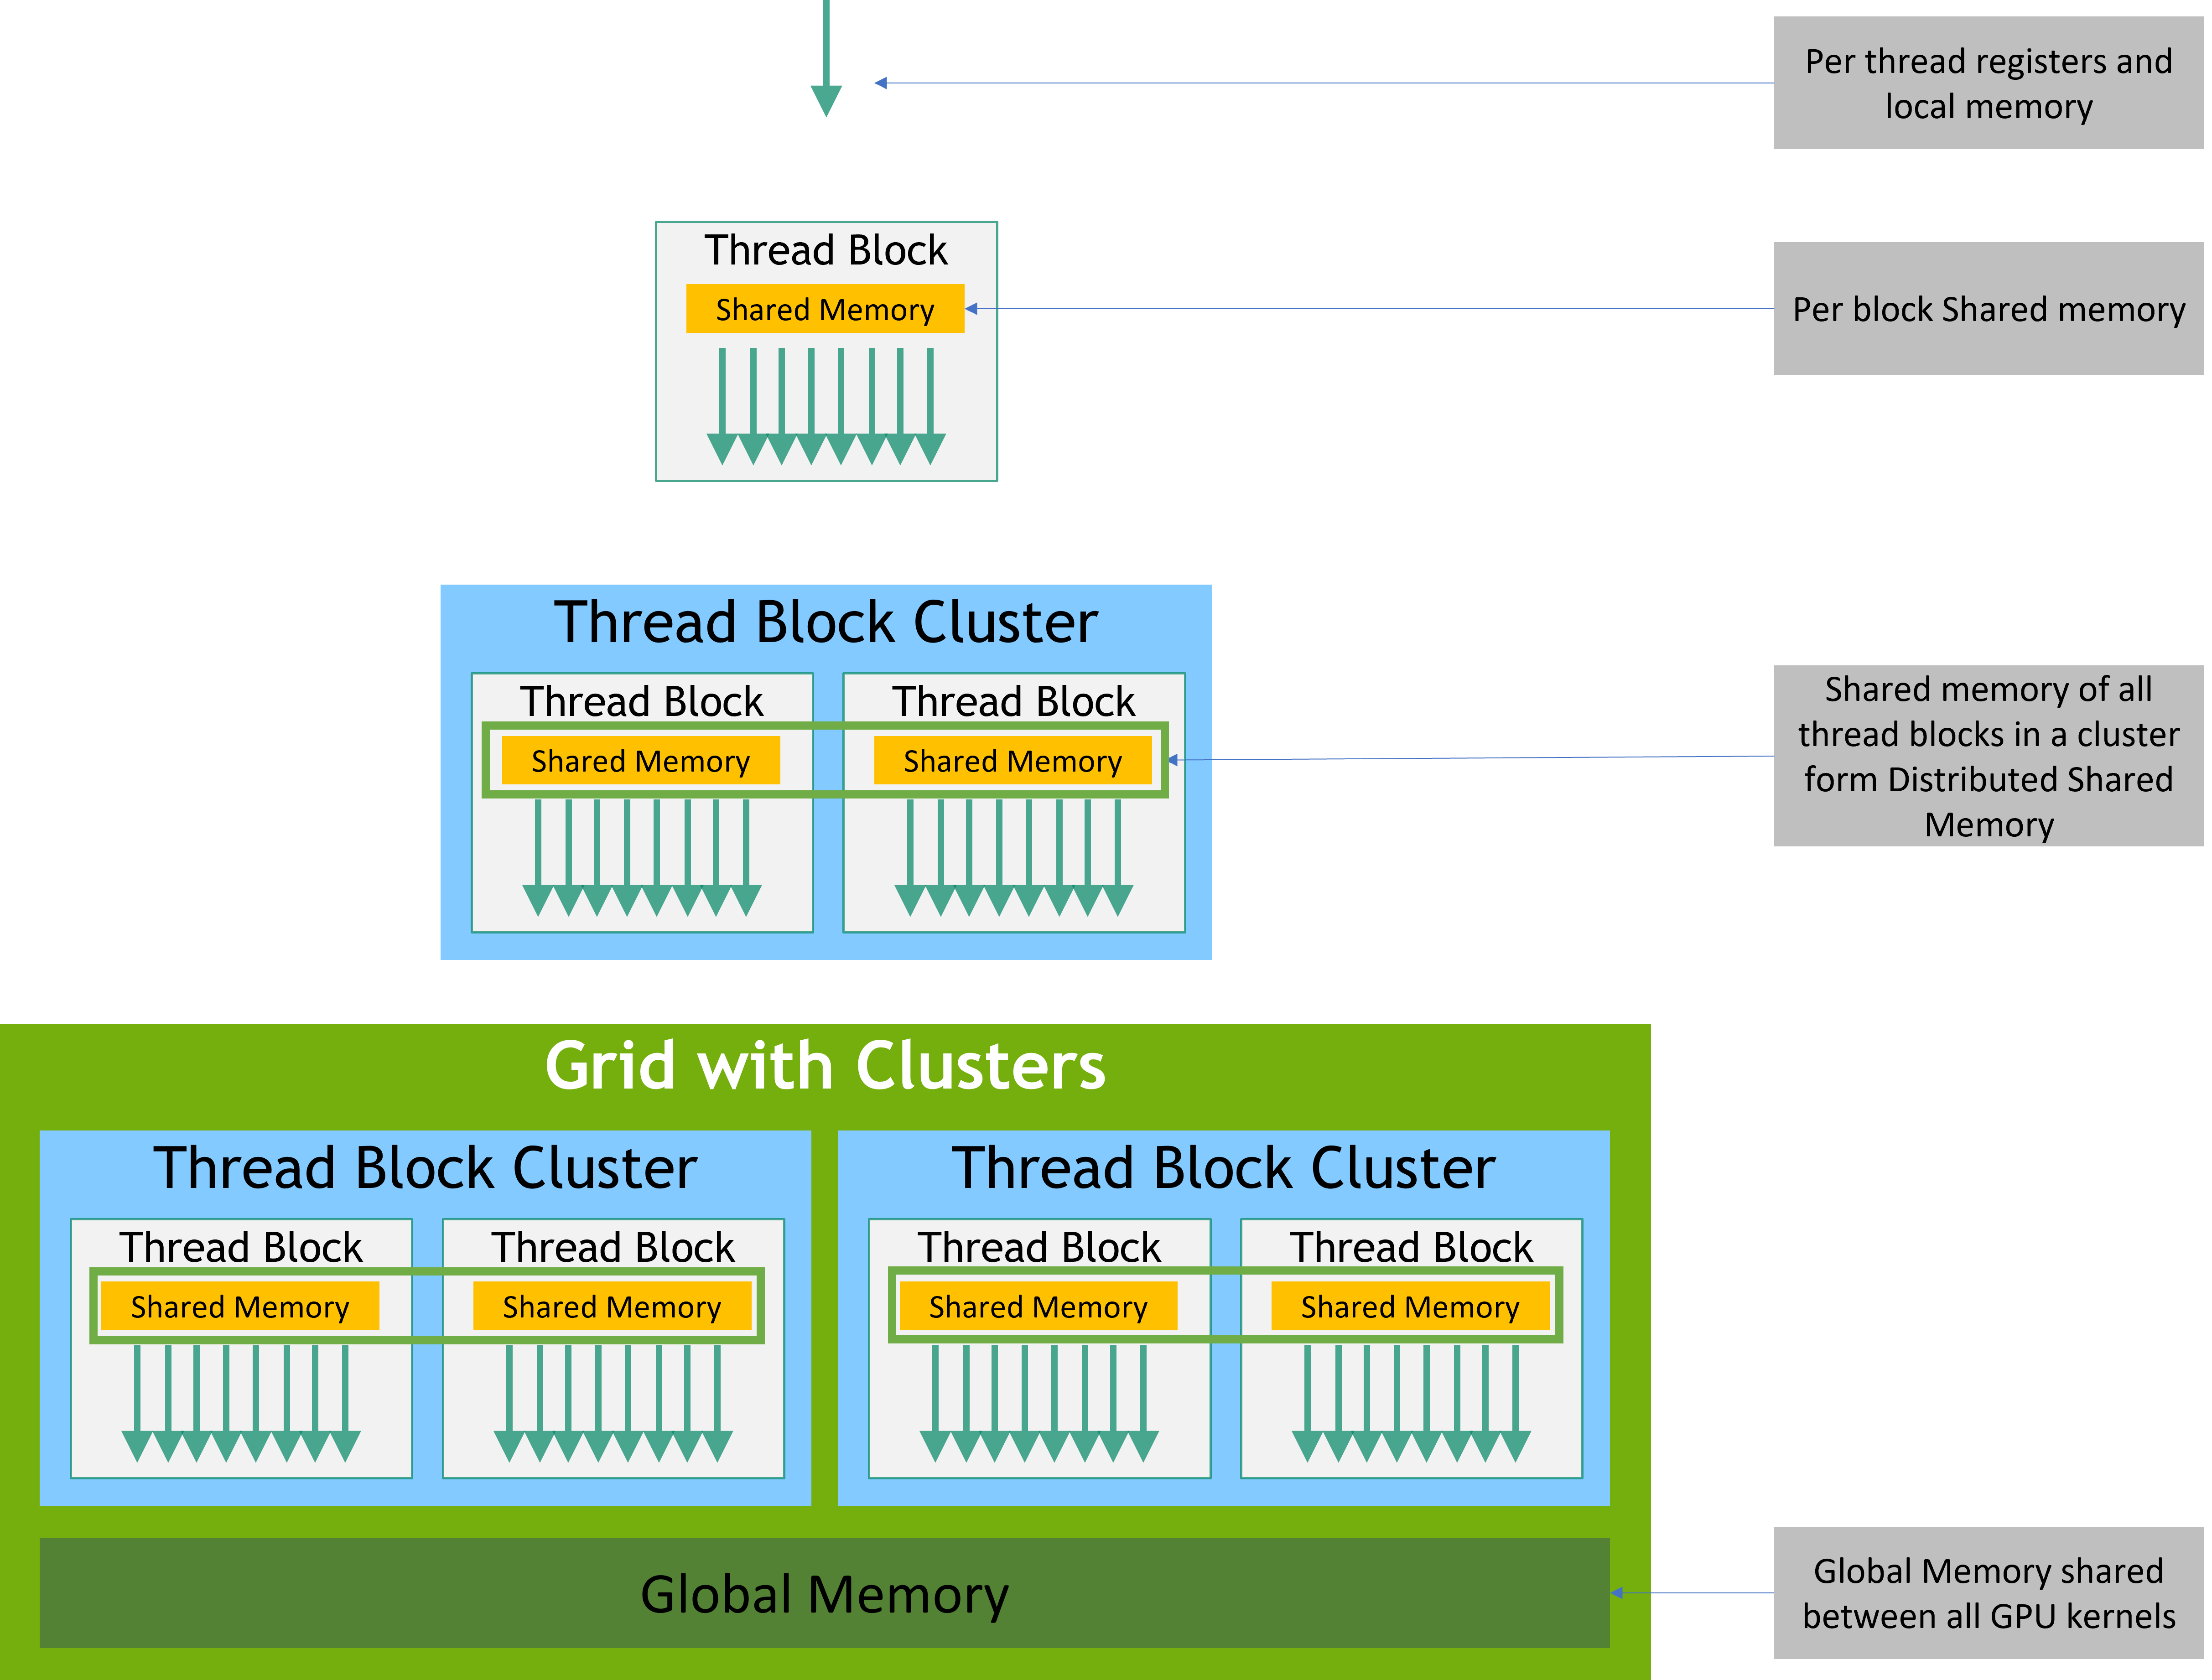

There are also two additional read-only memory spaces accessible by all threads: the constant and texture memory spaces. The global, constant, and texture memory spaces are optimized for different memory usages (see Device Memory Accesses). Texture memory also offers different addressing modes, as well as data filtering, for some specific data formats (see Texture and Surface Memory).

The global, constant, and texture memory spaces are persistent across kernel launches by the same application.